In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing holidays used for analysis
import os
os.system("pip install holidays")
from datetime import date
import holidays

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading consumer electronics csv file
df_CE = pd.read_csv("ConsumerElectronics.csv")
df_CE.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [3]:
df_CE.shape

(1648824, 20)

In [4]:
df_CE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [5]:
#Data should be from july-2015 to June-2016, deleting other data
df_CE = df_CE.loc[((df_CE[['Month']] > 6).all(axis=1) & (df_CE[['Year']] == 2015).all(axis=1)) | ((df_CE[['Month']] < 7).all(axis=1) & (df_CE[['Year']] == 2016).all(axis=1))]
df_CE.shape

(1648215, 20)

In [6]:
#Converting 'order_date' column to datetime data type
df_CE['order_date'] = pd.to_datetime(df_CE['order_date'].str.strip())
df_CE['order_date_new'] = df_CE['order_date'].dt.date

df_CE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648215 entries, 0 to 1648823
Data columns (total 21 columns):
fsn_id                             1648215 non-null object
order_date                         1648215 non-null datetime64[ns]
Year                               1648215 non-null int64
Month                              1648215 non-null int64
order_id                           1648215 non-null float64
order_item_id                      1648215 non-null float64
gmv                                1648215 non-null object
units                              1648215 non-null int64
deliverybdays                      1648215 non-null object
deliverycdays                      1648215 non-null object
s1_fact.order_payment_type         1648215 non-null object
sla                                1648215 non-null int64
cust_id                            1648215 non-null object
pincode                            1648215 non-null object
product_analytic_super_category    1648215 non-null obj

In [7]:
df_CE.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17


In [8]:
# Show column-wise null percentages here
round(100*(df_CE.isnull().sum()/len(df_CE.index)), 2)

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
deliverybdays                      0.0
deliverycdays                      0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
order_date_new                     0.0
dtype: float64

- so we can say that there are no null values in dataset

In [9]:
# unique 'product_analytic_super_category' present in df_CE dataframe
print(df_CE["product_analytic_super_category"].unique())

# unique 'product_analytic_category' present in df_CE dataframe
print(df_CE["product_analytic_category"].unique())

['CE']
['CameraAccessory' 'GamingHardware' 'EntertainmentSmall' 'GameCDDVD'
 'Camera']


In [10]:
# renaming columns and creating dummies and concatenating with old dataframe

df_CE.rename(columns={'s1_fact.order_payment_type':'payment_type'}, inplace=True)
dummies = pd.get_dummies(df_CE['payment_type']).rename(columns=lambda x: 'payment_type_' + str(x))
dummies = pd.DataFrame(dummies)
df_CE = pd.concat([df_CE, dummies], axis=1)
df_CE = df_CE.drop('payment_type', axis=1)
df_CE.head()
#dummies

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new,payment_type_COD,payment_type_Prepaid
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,1,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,1,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,1,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,0,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,0,1


In [11]:
# Drop columns which are not needed for analysis 
df_CE = df_CE.drop('product_analytic_super_category', axis=1)#not useful for analysis as all records have same value
df_CE = df_CE.drop('cust_id', axis=1)#not useful for annalysis
df_CE = df_CE.drop('pincode', axis=1)#not useful for annalysis
df_CE = df_CE.drop('deliverybdays', axis=1)#not useful for annalysis
df_CE = df_CE.drop('deliverycdays', axis=1)#not useful for annalysis
df_CE = df_CE.drop('fsn_id', axis=1)#not useful for annalysis

In [12]:
# replacing gmv with blank as 0
df_CE['gmv'] = df_CE['gmv'].replace(' ', 0)

# converting GMV to numeric
df_CE['gmv'] = pd.to_numeric(df_CE['gmv'])

# converting product_mrp to float
df_CE['product_mrp'] = df_CE['product_mrp'].astype(np.float64)
df_CE.shape

(1648215, 16)

In [13]:
df_CE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648215 entries, 0 to 1648823
Data columns (total 16 columns):
order_date                       1648215 non-null datetime64[ns]
Year                             1648215 non-null int64
Month                            1648215 non-null int64
order_id                         1648215 non-null float64
order_item_id                    1648215 non-null float64
gmv                              1648215 non-null float64
units                            1648215 non-null int64
sla                              1648215 non-null int64
product_analytic_category        1648215 non-null object
product_analytic_sub_category    1648215 non-null object
product_analytic_vertical        1648215 non-null object
product_mrp                      1648215 non-null float64
product_procurement_sla          1648215 non-null int64
order_date_new                   1648215 non-null object
payment_type_COD                 1648215 non-null uint8
payment_type_Prepaid      

In [14]:
# checking how percentage of rows where gmv=0
round(100*((df_CE['gmv'] == 0).sum()/len(df_CE.index)), 2)

0.38

In [15]:
#Imputing GMV value as MRP*Units whenever GMV is '0'.
df_CE['gmv']=np.where((df_CE['gmv'] == 0),df_CE['product_mrp']*df_CE['units'],df_CE['gmv'])

In [16]:
round(100*((df_CE['gmv'] == 0).sum()/len(df_CE.index)), 2)

0.02

- We can see now very little amount of rows exists where gmv=0, so we can drop them as it is very less count

In [17]:
#dropping rows with 'gmv' value '0'
df_CE = df_CE.loc[(df_CE[['gmv']] != 0).all(axis=1)]


#dropping rows with 'product_mrp' value '0'
df_CE = df_CE.loc[(df_CE[['product_mrp']] != 0).all(axis=1)]


# filtering out records where gmv is > mrp*units as we cant sell at rate higher than mrp
df_CE = df_CE[df_CE['product_mrp']*df_CE['units'] >= df_CE['gmv']]

### Creating new features

In [18]:
# creating new columns

df_CE['discount'] = (df_CE['product_mrp']*df_CE['units']) - df_CE['gmv']
df_CE['discount_percentage'] = round(df_CE['discount']*100 / df_CE['product_mrp'],2)
df_CE.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new,payment_type_COD,payment_type_Prepaid,discount,discount_percentage
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-17,1,0,790.0,10.99
1,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,7,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-19,1,0,290.0,4.03
2,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,10,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-20,1,0,109.0,5.19
3,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-14,0,1,409.0,19.49
4,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-17,0,1,481.0,22.92


In [19]:
df_CE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609275 entries, 0 to 1648823
Data columns (total 18 columns):
order_date                       1609275 non-null datetime64[ns]
Year                             1609275 non-null int64
Month                            1609275 non-null int64
order_id                         1609275 non-null float64
order_item_id                    1609275 non-null float64
gmv                              1609275 non-null float64
units                            1609275 non-null int64
sla                              1609275 non-null int64
product_analytic_category        1609275 non-null object
product_analytic_sub_category    1609275 non-null object
product_analytic_vertical        1609275 non-null object
product_mrp                      1609275 non-null float64
product_procurement_sla          1609275 non-null int64
order_date_new                   1609275 non-null object
payment_type_COD                 1609275 non-null uint8
payment_type_Prepaid      

In [20]:
# All numeric (float and int) variables in the dataset
ce_numeric = df_CE.select_dtypes(include=['float64', 'int64', 'int8','uint8'])
ce_numeric.head()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,payment_type_COD,payment_type_Prepaid,discount,discount_percentage
0,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,7190.0,0,1,0,790.0,10.99
1,2015,10,1.420831e+15,1.420831e+15,6900.0,1,7,7190.0,0,1,0,290.0,4.03
2,2015,10,2.421913e+15,2.421913e+15,1990.0,1,10,2099.0,3,1,0,109.0,5.19
3,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,2099.0,3,0,1,409.0,19.49
4,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,2099.0,3,0,1,481.0,22.92


In [21]:
ce_numeric = ce_numeric.drop('Year', axis=1)#not useful for annalysis
ce_numeric = ce_numeric.drop('Month', axis=1)#not useful for annalysis
ce_numeric = ce_numeric.drop('order_id', axis=1)#not useful for annalysis
ce_numeric = ce_numeric.drop('order_item_id', axis=1)#not useful for annalysis
ce_numeric = ce_numeric.drop('discount', axis=1)#not useful for annalysis

In [22]:
cor = ce_numeric.corr()
cor

,gmv,units,sla,product_mrp,product_procurement_sla,payment_type_COD,payment_type_Prepaid,discount_percentage
gmv,1.000000,0.042115,-0.125643,0.910456,0.000828,-0.138314,0.138314,-0.181274
units,0.042115,1.000000,-0.012566,-0.014873,-0.001035,-0.012813,0.012813,0.445094
sla,-0.125643,-0.012566,1.000000,-0.132549,-0.031387,0.098112,-0.098112,0.044708
product_mrp,0.910456,-0.014873,-0.132549,1.000000,-0.003994,-0.133599,0.133599,-0.063306
product_procurement_sla,0.000828,-0.001035,-0.031387,-0.003994,1.000000,0.004320,-0.004320,-0.065998
payment_type_COD,-0.138314,-0.012813,0.098112,-0.133599,0.004320,1.000000,-1.000000,0.067627
payment_type_Prepaid,0.138314,0.012813,-0.098112,0.133599,-0.004320,-1.000000,1.000000,-0.067627
discount_percentage,-0.181274,0.445094,0.044708,-0.063306,-0.065998,0.067627,-0.067627,1.000000


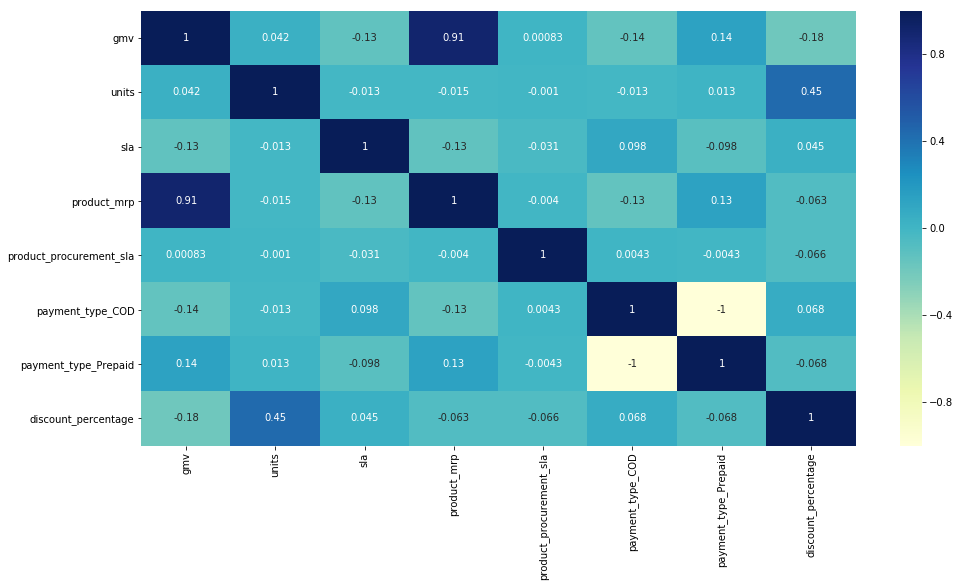

In [23]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

1. Correlation between 'gmv' and 'product_mrp' can be ignored as it is expected.
2. There is a high positive correlation between 'discount_percentage' and 'units' sold.
3. There is a positive correlation between 'payment_type_code' and 'gmv'.
4. There is a negative correlation between 'sla' and 'gmv'.

In [24]:
# creating new column week_number using order_date

df_CE['week_number']=df_CE['order_date'].dt.week
df_CE[df_CE['week_number']==1].head()


,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new,payment_type_COD,payment_type_Prepaid,discount,discount_percentage,week_number
118196,2016-01-09 10:37:30,2016,1,1.417929e+15,1.417929e+15,1299.0,1,5,EntertainmentSmall,Speaker,LaptopSpeaker,2222.0,3,2016-01-09,0,1,923.0,41.54,1
135839,2016-01-08 11:04:47,2016,1,2.418320e+15,2.418320e+15,1498.0,1,3,EntertainmentSmall,Speaker,MobileSpeaker,2999.0,1,2016-01-08,0,1,1501.0,50.05,1
268002,2016-01-10 10:58:33,2016,1,2.448506e+15,2.448506e+15,258.0,1,7,EntertainmentSmall,Speaker,MobileSpeaker,1000.0,1,2016-01-10,0,1,742.0,74.20,1
269503,2016-01-05 19:26:35,2016,1,4.454635e+15,4.454635e+15,1299.0,1,7,EntertainmentSmall,Speaker,MobileSpeaker,3199.0,1,2016-01-05,0,1,1900.0,59.39,1
274214,2016-01-05 18:30:58,2016,1,1.419515e+15,3.000373e+17,799.0,1,4,EntertainmentSmall,Speaker,LaptopSpeaker,1999.0,3,2016-01-05,0,1,1200.0,60.03,1


- we can observe some data quality issues because year 2016 should have largest weeknumber as we have taken data from 2015 july to 2016 june

In [25]:
df_CE['week_number']=np.where((df_CE['week_number']<=26) & (df_CE['Year']==2016),df_CE['week_number']+53,df_CE['week_number'])

In [26]:
df_CE.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new,payment_type_COD,payment_type_Prepaid,discount,discount_percentage,week_number
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-17,1,0,790.0,10.99,42
1,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,7,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-19,1,0,290.0,4.03,43
2,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,10,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-20,1,0,109.0,5.19,43
3,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-14,0,1,409.0,19.49,42
4,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-17,0,1,481.0,22.92,42


In [27]:
df_CE['week_number'].unique()

array([42, 43, 41, 44, 40, 45, 46, 69, 63, 39, 61, 70, 48, 47, 38, 60, 56,
       67, 55, 58, 57, 64, 59, 66, 62, 49, 35, 54, 65, 53, 71, 50, 51, 52,
       68, 76, 74, 72, 73, 75, 77, 78, 79, 29, 30, 28, 31, 37, 27, 32, 34,
       33, 36], dtype=int64)

Adding column 'special_day_flag' to dataframe

In [28]:
#Converting 'order_date_new' data type to date time
df_CE['order_date_new']=pd.to_datetime(df_CE['order_date_new'])
# creating special day
special_days=["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17",
                "2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27",
                "2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01",
                "2016-02-02","2016-02-14","2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25","2016-05-26","2016-05-27"]



In [29]:
df_CE['special_day_flag']= df_CE['order_date_new'].isin(special_days)
df_CE['special_day_flag'] = df_CE['special_day_flag'].astype('int32')
df_CE.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_new,payment_type_COD,payment_type_Prepaid,discount,discount_percentage,week_number,special_day_flag
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-17,1,0,790.0,10.99,42,1
1,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,7,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0,2015-10-19,1,0,290.0,4.03,43,0
2,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,10,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-20,1,0,109.0,5.19,43,0
3,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-14,0,1,409.0,19.49,42,0
4,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3,2015-10-17,0,1,481.0,22.92,42,1


Adding 'pay_flag' to dataframe

In [30]:
# creating new column pay_flag if date is 1st or 15th of month
df_CE['pay_flag']=np.where((df_CE['order_date'].dt.day==1)|(df_CE['order_date'].dt.day==15),1,0)

Adding 'holliday_flag' to dataframe

In [31]:
ca_holidays = holidays.CA()[date(2015, 7, 1): date(2016, 6, 30)]

In [32]:
df_CE['holiday_flag']= df_CE['order_date_new'].isin(ca_holidays)
df_CE['holiday_flag'] = df_CE['holiday_flag'].astype('int32')

In [33]:
print(df_CE.shape)
df_CE.info()

(1609275, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609275 entries, 0 to 1648823
Data columns (total 22 columns):
order_date                       1609275 non-null datetime64[ns]
Year                             1609275 non-null int64
Month                            1609275 non-null int64
order_id                         1609275 non-null float64
order_item_id                    1609275 non-null float64
gmv                              1609275 non-null float64
units                            1609275 non-null int64
sla                              1609275 non-null int64
product_analytic_category        1609275 non-null object
product_analytic_sub_category    1609275 non-null object
product_analytic_vertical        1609275 non-null object
product_mrp                      1609275 non-null float64
product_procurement_sla          1609275 non-null int64
order_date_new                   1609275 non-null datetime64[ns]
payment_type_COD                 1609275 non-null uint8
paym

### Reading other sheets of excel file

In [34]:
# reading nps sheet from media investment excel

nps= pd.read_excel("Media data and other information.xlsx", sheet_name = "Monthly NPS Score", skip =2,header=None)

In [35]:
nps.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
2,NPS,54.5996,59.9871,46.9254,44.3984,47,45.8,47.093,50.3274,49.0206,51.8276,47.307,50.5167
3,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


In [36]:
# dropping NA values

nps=nps.dropna()
nps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,NPS,54.5996,59.9871,46.9254,44.3984,47,45.8,47.093,50.3274,49.0206,51.8276,47.307,50.5167
3,Stock Index,1177,1206,1101,1210,1233,1038,1052,1222,1015,1242,1228,1194


In [37]:
# adding year and month as rows to nps dataframe

nps=nps.append(pd.Series(['Year',2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016],index=nps.columns),ignore_index=True)
nps=nps.append(pd.Series(['Month',7,8,9,10,11,12,1,2,3,4,5,6],index=nps.columns),ignore_index=True)
nps=nps.transpose()
nps

,0,1,2,3
0,NPS,Stock Index,Year,Month
1,54.5996,1177,2015,7
2,59.9871,1206,2015,8
3,46.9254,1101,2015,9
4,44.3984,1210,2015,10
5,47,1233,2015,11
6,45.8,1038,2015,12
7,47.093,1052,2016,1
8,50.3274,1222,2016,2
9,49.0206,1015,2016,3


In [38]:
# converting NPS datset into correct format useful for analysis

nps.columns=['NPS','Stock Index','Year','Month']
nps=nps.drop([0])
nps['NPS']=pd.to_numeric(nps['NPS'])
nps['Stock Index']=pd.to_numeric(nps['Stock Index'])
nps['Year']=pd.to_numeric(nps['Year'])
nps['Month']=pd.to_numeric(nps['Month'])
nps['NPS']=round(nps['NPS'],2)
nps

,NPS,Stock Index,Year,Month
1,54.60,1177,2015,7
2,59.99,1206,2015,8
3,46.93,1101,2015,9
4,44.40,1210,2015,10
5,47.00,1233,2015,11
6,45.80,1038,2015,12
7,47.09,1052,2016,1
8,50.33,1222,2016,2
9,49.02,1015,2016,3
10,51.83,1242,2016,4


In [39]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 4 columns):
NPS            12 non-null float64
Stock Index    12 non-null int64
Year           12 non-null int64
Month          12 non-null int64
dtypes: float64(1), int64(3)
memory usage: 480.0 bytes


### Reading Media data excel file

In [40]:
media= pd.read_excel("Media data and other information.xlsx", sheet_name = "Media Investment", skip =2,header=None)

In [41]:
media.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"Investment in various media heads, INR Cr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
3,NaN,2015,7,17.0618,0.21533,2.53301,7.41427,0.000932898,1.32728,0.547254,5.0237,NaN,NaN
4,NaN,2015,8,5.06431,0.00643807,1.27807,1.06333,6.32513e-06,0.129244,0.073684,2.51353,NaN,NaN


In [42]:
media=media.dropna(how='all')
media=media.drop([1,2])
media=media.dropna(how='all',axis=1)
media.columns=['Year','Month','Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','Affiliates'
              ,'SEM','Radio','Other']
media=media.reset_index()
media=media.drop('index',axis=1)
media

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.0618,0.21533,2.53301,7.41427,0.000932898,1.32728,0.547254,5.0237,NaN,NaN
1,2015,8,5.06431,0.00643807,1.27807,1.06333,6.32513e-06,0.129244,0.073684,2.51353,NaN,NaN
2,2015,9,96.2544,3.8795,1.35653,62.7877,0.610292,16.38,5.03827,6.20215,NaN,NaN
3,2015,10,170.156,6.14471,12.6225,84.6725,3.44407,24.3718,6.97371,31.927,NaN,NaN
4,2015,11,51.2162,4.22063,1.27547,14.1721,0.168633,19.5616,6.59577,5.22203,NaN,NaN
5,2015,12,106.745,5.3975,3.06336,56.7054,1.06731,22.5038,6.82694,11.181,NaN,NaN
6,2016,1,74.196,4.38,0.456,4.2,0.9,22.9,7.37,4.2,2.7,27.09
7,2016,2,48.052,2.58601,1.91265,11.7256,0.596771,19.8924,6.46502,4.87363,NaN,NaN
8,2016,3,100.025,9.3,2.1,41.59,0.37,18.4378,6.21767,5.19359,0.87,15.9455
9,2016,4,56.8482,5.2052,0.871892,24.3084,0.0348757,16.5145,5.69346,4.21996,NaN,NaN


In [43]:
# converting all the columns of media data to numeric format

media['Year']=pd.to_numeric(media['Year'])
media['Month']=pd.to_numeric(media['Month'])
media['Total Investment']=pd.to_numeric(media['Total Investment'])
media['TV']=pd.to_numeric(media['TV'])
media['Digital']=pd.to_numeric(media['Digital'])
media['Sponsorship']=pd.to_numeric(media['Sponsorship'])
media['Content Marketing']=pd.to_numeric(media['Content Marketing'])
media['Online marketing']=pd.to_numeric(media['Online marketing'])
media['Affiliates']=pd.to_numeric(media['Affiliates'])
media['SEM']=pd.to_numeric(media['SEM'])
media['Radio']=pd.to_numeric(media['Radio'])
media['Other']=pd.to_numeric(media['Other'])

In [44]:
# filling na values in media with 0 to suitably convert data into weekly spend from montly spend in next steps
media=media.fillna(0)

In [45]:
# converting montly spend into weekly spend 
media['Total Investment']=media['Total Investment']/4.30
media['TV']=media['TV']/4.30
media['Digital']=media['Digital']/4.30
media['Sponsorship']=media['Sponsorship']/4.30
media['Content Marketing']=media['Content Marketing']/4.30
media['Online marketing']=media['Online marketing']/4.30
media['Affiliates']=media['Affiliates']/4.30
media['SEM']=media['SEM']/4.30
media['Radio']=media['Radio']/4.30
media['Other']=media['Other']/4.30

In [46]:
media.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0
1,2015,8,1.177746,0.001497,0.297226,0.247286,0.000001,0.030057,0.017136,0.584541,0.0,0.0
2,2015,9,22.384740,0.902210,0.315472,14.601779,0.141928,3.809300,1.171690,1.442360,0.0,0.0
3,2015,10,39.571232,1.429003,2.935460,19.691286,0.800948,5.667855,1.621793,7.424886,0.0,0.0
4,2015,11,11.910749,0.981542,0.296621,3.295841,0.039217,4.549203,1.533899,1.214426,0.0,0.0


In [47]:
# creating week days information for the selected period 2015 july to 2016 june
days=pd.date_range(end='2016/06/30',periods=366)
weekdays=pd.DataFrame(days,columns=['date'])
weekdays['Month']=weekdays['date'].dt.month
weekdays['week']=weekdays['date'].dt.week
weekdays['year']=weekdays['date'].dt.year
weekdays['week']=np.where((weekdays['week']<=26) & (weekdays['year']==2016),weekdays['week']+53,weekdays['week'])

In [48]:
weekdays['nweek']=repr(1)

In [49]:
weekdays=weekdays.groupby(['Month','week'])['nweek'].count().reset_index(name='nweeks')

In [50]:
weekdays['frac']=weekdays['nweeks']/7
weekdays.head()

,Month,week,nweeks,frac
0,1,53,3,0.428571
1,1,54,7,1.000000
2,1,55,7,1.000000
3,1,56,7,1.000000
4,1,57,7,1.000000


In [51]:
weekdays1 = weekdays.groupby(['week']).agg({'Month':'mean', 'nweeks':'sum', 'frac':'sum'}).reset_index()
weekdays1.shape

(53, 4)

In [52]:
# now mwerging with media data to convert media data also to weekly data
media_weekly=pd.merge(weekdays,media,on='Month')

In [53]:
# converting media data into weekly spends so that we can merge all the dataframes at the end because analysis we are going to do 
# as per the weekly trend

media_weekly['Total Investment']=media_weekly['Total Investment']*media_weekly['frac']
media_weekly['TV']=media_weekly['TV']*media_weekly['frac']
media_weekly['Digital']=media_weekly['Digital']*media_weekly['frac']
media_weekly['Sponsorship']=media_weekly['Sponsorship']*media_weekly['frac']
media_weekly['Content Marketing']=media_weekly['Content Marketing']*media_weekly['frac']
media_weekly['Online marketing']=media_weekly['Online marketing']*media_weekly['frac']
media_weekly['Affiliates']=media_weekly['Affiliates']*media_weekly['frac']
media_weekly['SEM']=media_weekly['SEM']*media_weekly['frac']
media_weekly['Radio']=media_weekly['Radio']*media_weekly['frac']
media_weekly['Other']=media_weekly['Other']*media_weekly['frac']

In [54]:
# Aggreagating numeric columns of media weekly data by 'sum'

media_weekly_final = media_weekly.groupby(['week']).agg({'Total Investment':'sum','TV':'sum','Digital':'sum','Sponsorship':'sum', 'Content Marketing':'sum', 'Online marketing':'sum','Affiliates':'sum','SEM':'sum','Radio':'sum','Other':'sum'}).reset_index()
media_weekly_final.head()

,week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,2.834182,0.035769,0.420766,1.231606,0.000155,0.220478,0.090906,0.834501,0.0,0.0
1,28,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0
2,29,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0
3,30,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0
4,31,3.170681,0.036197,0.505688,1.302260,0.000155,0.229066,0.095802,1.001513,0.0,0.0


In [55]:
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

### Creating Adstock

In [56]:
#Creating Adstock
#ar_coeff = 0.9
media_weekly_final['TV_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['TV'], 0.6)
media_weekly_final['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Digital'], 0.2)
media_weekly_final['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Sponsorship'], 0.4)
media_weekly_final['ContentMarketing_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Content Marketing'], 0.15)
media_weekly_final['Onlinemarketing_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Online marketing'], 0.2)
media_weekly_final['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Affiliates'], 0.1)
media_weekly_final['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['SEM'], 0.1)
media_weekly_final['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Radio'], 0.3)
media_weekly_final['Other_adstock'] = tsa.filters.filtertools.recursive_filter(media_weekly_final['Other'], 0.1)

media_weekly_final.head(10)

,week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,TV_adstock,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,27,2.834182,0.035769,0.420766,1.231606,0.000155,0.220478,0.090906,0.834501,0.0,0.0,0.035769,0.420766,1.231606,0.000155,0.220478,0.090906,0.834501,0.0,0.0
1,28,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0,0.071538,0.673226,2.216891,0.000240,0.352765,0.136359,1.251752,0.0,0.0
2,29,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0,0.093000,0.723718,2.611005,0.000253,0.379222,0.140904,1.293477,0.0,0.0
3,30,3.967855,0.050077,0.589073,1.724249,0.000217,0.308669,0.127268,1.168302,0.0,0.0,0.105877,0.733817,2.768651,0.000255,0.384514,0.141359,1.297649,0.0,0.0
4,31,3.170681,0.036197,0.505688,1.302260,0.000155,0.229066,0.095802,1.001513,0.0,0.0,0.099723,0.652452,2.409720,0.000194,0.305968,0.109938,1.131278,0.0,0.0
5,32,1.177746,0.001497,0.297226,0.247286,0.000001,0.030057,0.017136,0.584541,0.0,0.0,0.061331,0.427717,1.211174,0.000031,0.091250,0.028130,0.697669,0.0,0.0
6,33,1.177746,0.001497,0.297226,0.247286,0.000001,0.030057,0.017136,0.584541,0.0,0.0,0.038296,0.382770,0.731756,0.000006,0.048307,0.019949,0.654308,0.0,0.0
7,34,1.177746,0.001497,0.297226,0.247286,0.000001,0.030057,0.017136,0.584541,0.0,0.0,0.024475,0.373780,0.539989,0.000002,0.039718,0.019131,0.649972,0.0,0.0
8,35,1.177746,0.001497,0.297226,0.247286,0.000001,0.030057,0.017136,0.584541,0.0,0.0,0.016182,0.371983,0.463282,0.000002,0.038000,0.019049,0.649539,0.0,0.0
9,36,19.355169,0.773537,0.312865,12.551138,0.121653,3.269408,1.006754,1.319815,0.0,0.0,0.783246,0.387262,12.736450,0.121653,3.277008,1.008658,1.384769,0.0,0.0


In [57]:
#Droping unnecessary columns- columns which are created before adstock as we use ADSTOCK columns from now

media_weekly_final = media_weekly_final.drop('Total Investment', axis=1)
media_weekly_final = media_weekly_final.drop('TV', axis=1)
media_weekly_final = media_weekly_final.drop('Digital', axis=1)
media_weekly_final = media_weekly_final.drop('Sponsorship', axis=1)
media_weekly_final = media_weekly_final.drop('Content Marketing', axis=1)
media_weekly_final = media_weekly_final.drop('Online marketing', axis=1)
media_weekly_final = media_weekly_final.drop('Affiliates', axis=1)
media_weekly_final = media_weekly_final.drop('SEM', axis=1)
media_weekly_final = media_weekly_final.drop('Radio', axis=1)
media_weekly_final = media_weekly_final.drop('Other', axis=1)

In [58]:
media_weekly_final.head()

,week,TV_adstock,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,27,0.035769,0.420766,1.231606,0.000155,0.220478,0.090906,0.834501,0.0,0.0
1,28,0.071538,0.673226,2.216891,0.000240,0.352765,0.136359,1.251752,0.0,0.0
2,29,0.093000,0.723718,2.611005,0.000253,0.379222,0.140904,1.293477,0.0,0.0
3,30,0.105877,0.733817,2.768651,0.000255,0.384514,0.141359,1.297649,0.0,0.0
4,31,0.099723,0.652452,2.409720,0.000194,0.305968,0.109938,1.131278,0.0,0.0


Preapring weather information DataFrame

In [59]:
df_w15 = pd.read_excel('ONTARIO-2015.xlsx', header = None)
df_w15 = df_w15.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df_w16 = pd.read_excel('ONTARIO-2016.xlsx', header = None)
df_w16 = df_w16.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

In [60]:
columns=['Date','Year','Month','Day','Data Quality','Max Temp (°C)','Max Temp Flag','Min Temp (°C)','Min Temp Flag','Mean Temp (°C)','Mean Temp Flag','Heat Deg Days (°C)','Heat Deg Days Flag','Cool Deg Days (°C)','Cool Deg Days Flag','Total Rain (mm)','Total Rain Flag','Total Snow (cm)','Total Snow Flag','Total Precip (mm)','Total Precip Flag','Snow on Grnd (cm)','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)','Spd of Max Gust Flag']

#Setting column headings
df_w15.columns = columns
df_w16.columns = columns

#Filtering data to the required duration
df_w15 = df_w15.loc[((df_w15[['Month']] > 6).all(axis=1) & (df_w15[['Year']] == 2015).all(axis=1))]
df_w16 = df_w16.loc[((df_w16[['Month']] < 7).all(axis=1) & (df_w16[['Year']] == 2016).all(axis=1))]

In [61]:
#Concatenating data of years 2015 and 2016
df_w = pd.concat([df_w15, df_w16])
df_w = df_w.reset_index()
df_w = df_w.drop('index',axis=1)
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date                         366 non-null object
Year                         366 non-null object
Month                        366 non-null object
Day                          366 non-null object
Data Quality                 215 non-null object
Max Temp (°C)                208 non-null object
Max Temp Flag                7 non-null object
Min Temp (°C)                191 non-null object
Min Temp Flag                24 non-null object
Mean Temp (°C)               191 non-null object
Mean Temp Flag               24 non-null object
Heat Deg Days (°C)           191 non-null object
Heat Deg Days Flag           24 non-null object
Cool Deg Days (°C)           191 non-null object
Cool Deg Days Flag           24 non-null object
Total Rain (mm)              215 non-null object
Total Rain Flag              7 non-null object
Total Snow (cm)              215 non-null object
Total Snow Flag      

In [62]:
#Changing data type
df_w['Date']=pd.to_datetime(df_w['Date'])
df_w["Heat Deg Days (°C)"] = pd.to_numeric(df_w["Heat Deg Days (°C)"],errors='coerce')
df_w["Cool Deg Days (°C)"] = pd.to_numeric(df_w["Cool Deg Days (°C)"],errors='coerce')
df_w["Total Precip (mm)"] = pd.to_numeric(df_w["Total Precip (mm)"],errors='coerce')
df_w["Month"] = pd.to_numeric(df_w["Month"],errors='coerce')
df_w["Year"] = pd.to_numeric(df_w["Year"],errors='coerce')
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date                         366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null object
Data Quality                 215 non-null object
Max Temp (°C)                208 non-null object
Max Temp Flag                7 non-null object
Min Temp (°C)                191 non-null object
Min Temp Flag                24 non-null object
Mean Temp (°C)               191 non-null object
Mean Temp Flag               24 non-null object
Heat Deg Days (°C)           191 non-null float64
Heat Deg Days Flag           24 non-null object
Cool Deg Days (°C)           191 non-null float64
Cool Deg Days Flag           24 non-null object
Total Rain (mm)              215 non-null object
Total Rain Flag              7 non-null object
Total Snow (cm)              215 non-null object
Total Snow Fl

In [63]:
# removing the columns having more than 90% missing values
drop_columns = df_w.columns[100*(df_w.isnull().sum()/len(df_w.index)) > 90]
df_w = df_w.drop(drop_columns, axis=1)

df_w=df_w.drop('Data Quality',axis=1)#Droping column as it is not useful for analysis

print(df_w.shape)

(366, 13)


### Converting data into few flag columns based on conditions like summer , winter, precipitation, heat,cold degrees given in climate data in problem statement whcih will be very handy in doing analysis

In [64]:
# Creating different flags i.e. heat deg, cooldeg, total precp flags based on below conditions

df_w['hdd_flag']=np.where((df_w['Heat Deg Days (°C)'] > 18),1,0)
df_w['cdd_flag']=np.where((df_w['Cool Deg Days (°C)'] > 1.8),1,0)
df_w['percip_flag']=np.where((df_w['Total Precip (mm)'] > 4),1,0)

In [65]:
# creating weather flag

df_w['weather_flag']=np.where((df_w['percip_flag'] == 1)|(df_w['cdd_flag'] == 1)|(df_w['hdd_flag'] == 1),1,0)

In [66]:
# Just testing how many rows created in each of those flags

df_final_holiday_hdd = df_w[(df_w['hdd_flag'] == 1)]
df_final_holiday_cdd = df_w[(df_w['cdd_flag'] == 1)]
df_final_holiday_percip = df_w[(df_w['percip_flag'] == 1)]
df_final_holiday_weather = df_w[(df_w['weather_flag'] == 1)]
print(df_final_holiday_hdd.shape)
print(df_final_holiday_cdd.shape)
print(df_final_holiday_percip.shape)
print(df_final_holiday_weather.shape)

(14, 17)
(69, 17)
(40, 17)
(112, 17)


In [67]:
#Droping unnecessary columns
df_w=df_w.drop('Year',axis=1)
df_w=df_w.drop('Month',axis=1)
df_w=df_w.drop('Day',axis=1)
df_w.head(15)

,Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),hdd_flag,cdd_flag,percip_flag,weather_flag
0,2015-07-01,24.5,17,20.8,0.0,2.8,0,0,0.0,0,0,1,0,1
1,2015-07-02,24,14,19,0.0,1.0,0,0,0.0,0,0,0,0,0
2,2015-07-03,25,10,17.5,0.5,0.0,0,0,0.0,0,0,0,0,0
3,2015-07-04,26,11,18.5,0.0,0.5,0,0,0.0,0,0,0,0,0
4,2015-07-05,28,14,21,0.0,3.0,0,0,0.0,0,0,1,0,1
5,2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,2015-07-07,26,18,22,0.0,4.0,8.6,0,8.6,0,0,1,1,1
7,2015-07-08,20,12.5,16.3,1.7,0.0,14.4,0,14.4,0,0,0,1,1
8,2015-07-09,24,17,20.5,0.0,2.5,3.5,0,3.5,0,0,1,0,1
9,2015-07-10,26,13,19.5,0.0,1.5,0,0,0.0,0,0,0,0,0


Converting weather data to weekly 

In [68]:
df_CE=pd.merge(df_CE, df_w,left_on= 'order_date_new', right_on = 'Date')
print(df_CE.shape)
df_CE.head()

(1609275, 36)


,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),hdd_flag,cdd_flag,percip_flag,weather_flag
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,NaN,NaN,0,0,0.0,0,0,0,0,0
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,NaN,NaN,0,0,0.0,0,0,0,0,0
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,NaN,NaN,0,0,0.0,0,0,0,0,0
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,NaN,NaN,0,0,0.0,0,0,0,0,0
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,NaN,NaN,0,0,0.0,0,0,0,0,0


In [69]:
df_CE = df_CE.drop('Date',axis=1)

In [70]:
# dropping unnecessary columns as flags were created for this before
df_CE=df_CE.drop('Total Precip (mm)',axis=1)
df_CE=df_CE.drop('Snow on Grnd (cm)',axis=1)
df_CE=df_CE.drop('Heat Deg Days (°C)',axis=1)
df_CE=df_CE.drop('Cool Deg Days (°C)',axis=1)


In [71]:
# dropping these as they all combined into one flag called weather flag. weather flag created using these 3 flags so filtered data
# on these.

df_CE=df_CE.drop('hdd_flag',axis=1)
df_CE=df_CE.drop('cdd_flag',axis=1)
df_CE=df_CE.drop('percip_flag',axis=1)

In [72]:
df_CE.shape

(1609275, 28)

In [73]:
df_CE.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,week_number,special_day_flag,pay_flag,holiday_flag,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),weather_flag
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,42,1,0,0,9,NaN,NaN,0,0,0
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,42,1,0,0,9,NaN,NaN,0,0,0
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,42,1,0,0,9,NaN,NaN,0,0,0
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,42,1,0,0,9,NaN,NaN,0,0,0
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,42,1,0,0,9,NaN,NaN,0,0,0


In [74]:
print(round(df_CE['Max Temp (°C)'].isnull().sum()/len(df_CE.index),2))
print(round(df_CE['Min Temp (°C)'].isnull().sum()/len(df_CE.index),2))
print(round(df_CE['Mean Temp (°C)'].isnull().sum()/len(df_CE.index),2))
print(round(df_CE['Total Rain (mm)'].isnull().sum()/len(df_CE.index),2))
print(round(df_CE['Total Snow (cm)'].isnull().sum()/len(df_CE.index),2))


0.44
0.5
0.5
0.41
0.41


In [75]:
print(df_CE['Max Temp (°C)'].unique())

[9 nan 22 15 19.5 16 20.5 20 22.5 21.5 24.5 17.5 23 17 15.5 13.5 18 25.5 2
 -3 18.5 14.5 7 -5 9.5 6.5 8 26.5 29 11 12.5 3 1 8.5 13 10.5 1.5 12 4.5
 7.5 19 -8.5 -1.5 11.5 5.5 2.5 6 5 35 21 31 24 14 23.5 25 30 27.5 33 30.5
 34.5 34 26 28 27 31.5 32 33.5 28.5 32.5]


#### So there are around 50% of null values in the above columns and these columns we cannot replace null values with mean of respective columns as this may lead to inconsistency in data, so its better to drop them instead of imputing with incorrect values

In [76]:
df_CE=df_CE.drop('Max Temp (°C)',axis=1)
df_CE=df_CE.drop('Min Temp (°C)',axis=1)
df_CE=df_CE.drop('Mean Temp (°C)',axis=1)
df_CE=df_CE.drop('Total Rain (mm)',axis=1)
df_CE=df_CE.drop('Total Snow (cm)',axis=1)

In [77]:
df_CE.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,order_date_new,payment_type_COD,payment_type_Prepaid,discount,discount_percentage,week_number,special_day_flag,pay_flag,holiday_flag,weather_flag
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,2015-10-17,1,0,790.0,10.99,42,1,0,0,0
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,2015-10-17,0,1,481.0,22.92,42,1,0,0,0
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,2015-10-17,0,1,720.0,17.80,42,1,0,0,0
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,2015-10-17,1,0,401.0,5.61,42,1,0,0,0
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,2015-10-17,1,0,480.0,6.71,42,1,0,0,0


In [78]:
# merging consumer and media

df_final=pd.merge(df_CE,media_weekly_final,left_on='week_number',right_on='week')

In [79]:
df_final.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,week,TV_adstock,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,42,3.138071,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,42,3.138071,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,42,3.138071,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,42,3.138071,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,42,3.138071,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0


In [80]:
# merging df_final with nps

df_final=pd.merge(df_final,nps,on=['Year','Month'])

In [81]:
df_final.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210


In [82]:
df_final.shape

(1609275, 35)

In [83]:
#Droping 'product_mrp' as it will be highly correlated with 'gmv'
df_final = df_final.drop('product_mrp', axis=1)

#Droping 'payment_type_Prepaid' 
df_final = df_final.drop('payment_type_Prepaid', axis=1)

In [84]:
# All numeric (float and int) variables in the dataset
df_final_num = df_final.select_dtypes(include=['float64', 'int64', 'int32','int8','uint8'])
df_final_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609275 entries, 0 to 1609274
Data columns (total 28 columns):
Year                        1609275 non-null int64
Month                       1609275 non-null int64
order_id                    1609275 non-null float64
order_item_id               1609275 non-null float64
gmv                         1609275 non-null float64
units                       1609275 non-null int64
sla                         1609275 non-null int64
product_procurement_sla     1609275 non-null int64
payment_type_COD            1609275 non-null uint8
discount                    1609275 non-null float64
discount_percentage         1609275 non-null float64
week_number                 1609275 non-null int64
special_day_flag            1609275 non-null int32
pay_flag                    1609275 non-null int32
holiday_flag                1609275 non-null int32
weather_flag                1609275 non-null int32
week                        1609275 non-null int64
TV_adstock

In [85]:
df_final_num = df_final_num.drop('Year', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('Month', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('order_id', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('order_item_id', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('discount', axis=1)#not useful for annalysis

In [86]:
#Checking outliers
df_final_num.describe()

,gmv,units,sla,product_procurement_sla,payment_type_COD,discount_percentage,week_number,special_day_flag,pay_flag,holiday_flag,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
count,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,...,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06,1.609275e+06
mean,2.475006e+03,1.021687e+00,5.679308e+00,5.348364e+00,7.230212e-01,4.556691e+01,5.442995e+01,1.801209e-01,6.566994e-02,2.125616e-02,...,8.703669e-01,1.423898e+01,2.430949e-01,5.368884e+00,1.499437e+00,2.385284e+00,1.404343e-01,1.121607e+00,4.812891e+01,1.152041e+03
std,5.634895e+03,2.485386e-01,2.987643e+00,5.283963e+01,4.475060e-01,2.617139e+01,1.380745e+01,3.842882e-01,2.477043e-01,1.442371e-01,...,1.032614e+00,8.868692e+00,2.701541e-01,1.701671e+00,4.436824e-01,2.227198e+00,2.348155e-01,2.049594e+00,2.646814e+00,8.339809e+01
min,1.000000e+01,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.333547e-01,4.632820e-01,1.827687e-06,3.800044e-02,1.904888e-02,5.929683e-01,0.000000e+00,0.000000e+00,4.440000e+01,1.015000e+03
25%,3.400000e+02,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,2.859000e+01,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,3.003726e-01,7.595651e+00,6.783862e-02,4.803671e+00,1.471260e+00,1.244972e+00,0.000000e+00,0.000000e+00,4.693000e+01,1.052000e+03
50%,7.590000e+02,1.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00,4.529000e+01,5.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,4.875250e-01,1.211980e+01,1.651422e-01,5.789658e+00,1.672886e+00,1.355375e+00,5.437980e-03,6.999570e-04,4.709000e+01,1.194000e+03
75%,1.999000e+03,1.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,6.102000e+01,6.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,7.338166e-01,1.969636e+01,2.505979e-01,6.641752e+00,1.763930e+00,2.193336e+00,2.550024e-01,1.287508e+00,5.033000e+01,1.228000e+03
max,2.269470e+05,5.000000e+01,1.006000e+03,1.000000e+03,1.000000e+00,3.391300e+03,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,3.655103e+00,3.244306e+01,9.409455e-01,7.074711e+00,1.904384e+00,8.246645e+00,8.919239e-01,6.999570e+00,5.999000e+01,1.242000e+03


#### Doing EDA

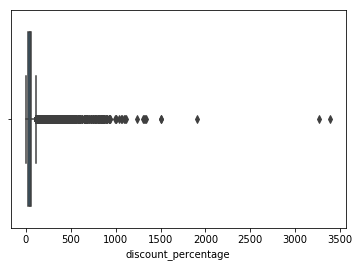

In [87]:
sns.boxplot(x=df_final_num['discount_percentage'])

In [88]:
#Outlier treatment

# deleting the outliers from the datset
df_final_out = df_final_num[np.abs(df_final_num.discount_percentage-df_final_num.discount_percentage.mean())<=(2*df_final_num.discount_percentage.std())] 

In [89]:
df_final_out.shape

(1594469, 23)

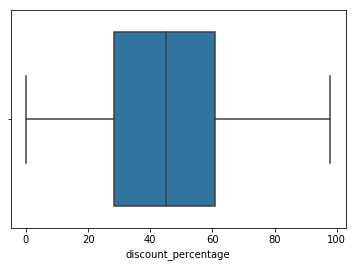

In [90]:
sns.boxplot(x=df_final_out['discount_percentage'])

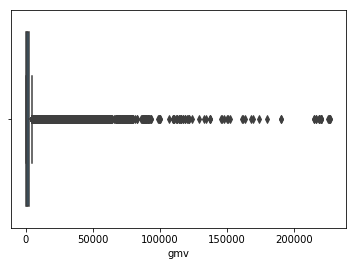

In [91]:
sns.boxplot(x=df_final_out['gmv'])

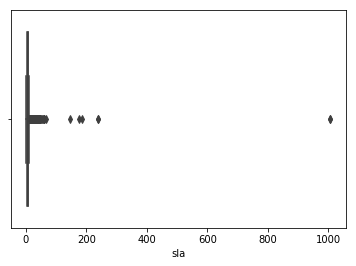

In [92]:
sns.boxplot(x=df_final_out['sla'])

In [93]:
df_final_out.describe()

,gmv,units,sla,product_procurement_sla,payment_type_COD,discount_percentage,week_number,special_day_flag,pay_flag,holiday_flag,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
count,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,...,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06,1.594469e+06
mean,2.479432e+03,1.008207e+00,5.684739e+00,5.350009e+00,7.233311e-01,4.455993e+01,5.444959e+01,1.794698e-01,6.542053e-02,2.128420e-02,...,8.683106e-01,1.422677e+01,2.425690e-01,5.367973e+00,1.499305e+00,2.380927e+00,1.405290e-01,1.122269e+00,4.813247e+01,1.152044e+03
std,5.644588e+03,1.184965e-01,2.989599e+00,5.295394e+01,4.473515e-01,2.216329e+01,1.380938e+01,3.837453e-01,2.472665e-01,1.443302e-01,...,1.030498e+00,8.858146e+00,2.696467e-01,1.700911e+00,4.435362e-01,2.222714e+00,2.347534e-01,2.049349e+00,2.645559e+00,8.341540e+01
min,1.900000e+01,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.333547e-01,4.632820e-01,1.827687e-06,3.800044e-02,1.904888e-02,5.929683e-01,0.000000e+00,0.000000e+00,4.440000e+01,1.015000e+03
25%,3.390000e+02,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,2.837000e+01,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,3.003726e-01,7.595651e+00,6.783862e-02,4.803671e+00,1.471260e+00,1.244972e+00,0.000000e+00,0.000000e+00,4.693000e+01,1.052000e+03
50%,7.520000e+02,1.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00,4.505000e+01,5.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,4.875250e-01,1.211980e+01,1.651422e-01,5.789658e+00,1.672886e+00,1.355375e+00,5.437980e-03,6.999570e-04,4.709000e+01,1.194000e+03
75%,1.999000e+03,1.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,6.076000e+01,6.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,7.281001e-01,1.969636e+01,2.505979e-01,6.641752e+00,1.763930e+00,1.950660e+00,2.550024e-01,1.287508e+00,5.033000e+01,1.228000e+03
max,2.269470e+05,2.100000e+01,1.006000e+03,1.000000e+03,1.000000e+00,9.790000e+01,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,3.655103e+00,3.244306e+01,9.409455e-01,7.074711e+00,1.904384e+00,8.246645e+00,8.919239e-01,6.999570e+00,5.999000e+01,1.242000e+03


In [94]:
cor1 = df_final_out.corr()
cor1

,gmv,units,sla,product_procurement_sla,payment_type_COD,discount_percentage,week_number,special_day_flag,pay_flag,holiday_flag,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
gmv,1.000000,0.044203,-0.126133,0.000834,-0.138819,-0.219793,0.025967,0.056555,-0.015782,-0.003944,...,-0.002873,-0.001689,0.001483,0.023962,0.025266,-0.001380,0.020739,0.019321,-0.013158,-0.008399
units,0.044203,1.000000,-0.010607,-0.001525,-0.011683,0.042168,-0.005184,-0.005400,-0.002100,0.000604,...,-0.005022,-0.002354,-0.005228,-0.006242,-0.005817,-0.005015,-0.000547,0.000025,0.002187,-0.007506
sla,-0.126133,-0.010607,1.000000,-0.031299,0.098315,0.061444,-0.043663,-0.048139,0.000375,-0.002576,...,-0.016106,-0.032529,-0.015517,-0.015337,-0.009533,-0.020541,0.017301,0.021914,0.026001,-0.015412
product_procurement_sla,0.000834,-0.001525,-0.031299,1.000000,0.004356,-0.077951,0.016843,-0.007588,-0.001651,-0.000321,...,-0.013580,-0.005991,-0.013613,-0.013286,-0.013942,-0.013328,-0.000215,-0.003264,0.008439,0.001612
payment_type_COD,-0.138819,-0.011683,0.098315,0.004356,1.000000,0.084532,-0.087363,0.009514,0.011978,0.016351,...,0.038901,0.022446,0.074040,0.042619,0.018413,0.042853,0.048451,0.038460,-0.149906,-0.098533
discount_percentage,-0.219793,0.042168,0.061444,-0.077951,0.084532,1.000000,0.063585,0.042364,-0.001902,-0.004521,...,0.013937,0.001351,0.026677,0.067545,0.066374,0.017737,0.037491,0.032386,-0.014779,-0.000260
week_number,0.025967,-0.005184,-0.043663,0.016843,-0.087363,0.063585,1.000000,-0.104744,-0.020177,-0.007670,...,-0.420281,-0.360886,-0.361637,0.130366,0.164940,-0.395710,0.312952,0.229569,0.261854,0.157416
special_day_flag,0.056555,-0.005400,-0.048139,-0.007588,0.009514,0.042364,-0.104744,1.000000,0.051584,0.116082,...,0.296330,0.185489,0.313049,0.262346,0.236851,0.293188,0.043075,0.046343,-0.244314,0.048385
pay_flag,-0.015782,-0.002100,0.000375,-0.001651,0.011978,-0.001902,-0.020177,0.051584,1.000000,0.110781,...,0.065108,0.058483,0.057146,0.018345,0.013921,0.063441,-0.037027,-0.025870,-0.031721,0.007300
holiday_flag,-0.003944,0.000604,-0.002576,-0.000321,0.016351,-0.004521,-0.007670,0.116082,0.110781,1.000000,...,-0.010063,0.044006,0.013999,0.054589,0.051090,0.000716,0.003768,0.011997,-0.052431,-0.073960


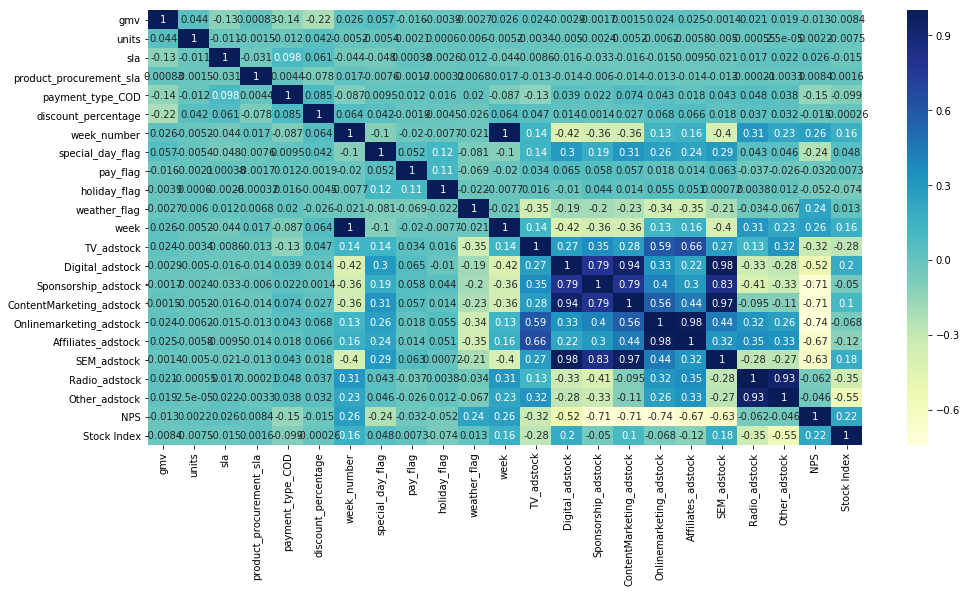

In [95]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

In [96]:
# just checking how manu holiday ,pay, special day flags in datset
df_final_holiday = df_final[(df_final['holiday_flag'] == 1)]
df_final_pay = df_final[(df_final['pay_flag'] == 1)]
df_final_special = df_final[(df_final['special_day_flag'] == 1)]

print (df_final_holiday.shape)
print (df_final_pay.shape)
print (df_final_special.shape)

(34207, 33)
(105681, 33)
(289864, 33)


In [97]:
# All numeric (float and int) variables in the dataset
df_final_num = df_final.select_dtypes(include=['float64', 'int64', 'int32','int8','uint8'])
df_final_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609275 entries, 0 to 1609274
Data columns (total 28 columns):
Year                        1609275 non-null int64
Month                       1609275 non-null int64
order_id                    1609275 non-null float64
order_item_id               1609275 non-null float64
gmv                         1609275 non-null float64
units                       1609275 non-null int64
sla                         1609275 non-null int64
product_procurement_sla     1609275 non-null int64
payment_type_COD            1609275 non-null uint8
discount                    1609275 non-null float64
discount_percentage         1609275 non-null float64
week_number                 1609275 non-null int64
special_day_flag            1609275 non-null int32
pay_flag                    1609275 non-null int32
holiday_flag                1609275 non-null int32
weather_flag                1609275 non-null int32
week                        1609275 non-null int64
TV_adstock

In [98]:
df_final_num = df_final_num.drop('Year', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('Month', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('order_id', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('order_item_id', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('discount', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('week_number', axis=1)#not useful for annalysis
df_final_num = df_final_num.drop('units', axis=1)#not useful for annalysis


In [99]:
# now converting final merged dataset into weekly aggregation

df_final_week = pd.DataFrame(columns=[])
df_final_week = df_final_num.groupby(['week']).agg({'gmv':'mean','sla':'mean',
                                                    'weather_flag':'mean', 'discount_percentage':'mean',
                                                    'special_day_flag':'mean','payment_type_COD':'mean',
                                                    'pay_flag':'mean','product_procurement_sla':'mean',
                                                    'Stock Index':'mean','NPS':'mean',
                                                    'Other_adstock':'mean','Radio_adstock':'mean','SEM_adstock':'mean',
                                                    'Affiliates_adstock':'mean','Onlinemarketing_adstock':'mean',
                                                    'ContentMarketing_adstock':'mean','TV_adstock':'mean',
                                                    'Digital_adstock':'mean','holiday_flag':'mean','Sponsorship_adstock':'mean'}).reset_index()

df_final_week.head()

,week,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,...,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,27,2311.541516,2.815884,0.101083,43.607112,0.000000,0.007220,0.097473,2.877256,1177.000000,...,0.0,0.0,0.834501,0.090906,0.220478,0.000155,0.035769,0.420766,0.097473,1.231606
1,28,1830.079881,6.328022,0.859162,41.027182,0.000000,0.713470,0.000000,3.914397,1177.000000,...,0.0,0.0,1.251752,0.136359,0.352765,0.000240,0.071538,0.673226,0.000000,2.216891
2,29,2139.885808,6.054871,0.573561,41.155022,0.284452,0.716505,0.144250,4.704626,1177.000000,...,0.0,0.0,1.293477,0.140904,0.379222,0.000253,0.093000,0.723718,0.000000,2.611005
3,30,1954.339875,6.039926,0.727292,42.342984,0.000000,0.744457,0.000000,4.085574,1177.000000,...,0.0,0.0,1.297649,0.141359,0.384514,0.000255,0.105877,0.733817,0.000000,2.768651
4,31,2108.898573,6.348611,0.796273,41.645978,0.000000,0.752272,0.000262,4.455508,1177.011376,...,0.0,0.0,1.131278,0.109938,0.305968,0.000194,0.099723,0.652452,0.000000,2.409720


#### Doing EDA on weekly aggregated merged data

#### Different adstocks by weekly

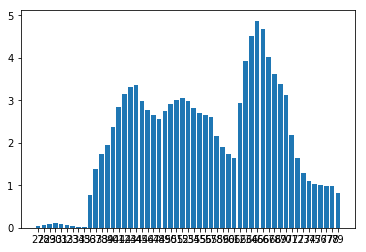

In [100]:
# 'TV_adstock' by weekly
height = df_final_week['TV_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

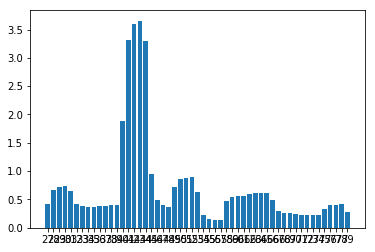

In [101]:
# 'Digital_adstock' by weekly
height = df_final_week['Digital_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

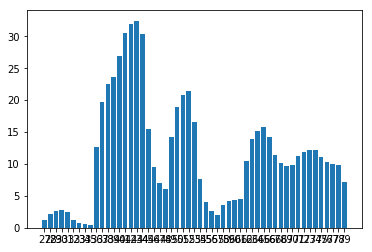

In [102]:
# 'Sponsorship_adstock' by weekly
height = df_final_week['Sponsorship_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

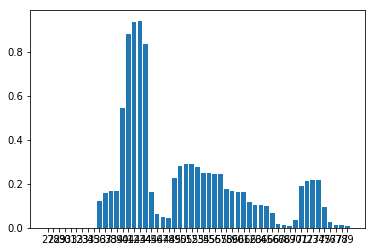

In [103]:
# 'ContentMarketing_adstock' by weekly
height = df_final_week['ContentMarketing_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

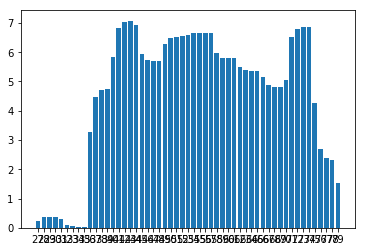

In [104]:
# 'Onlinemarketing_adstock' by weekly
height = df_final_week['Onlinemarketing_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

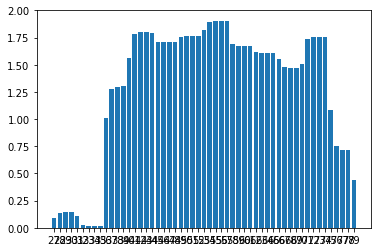

In [105]:
# 'Affiliates_adstock' by weekly
height = df_final_week['Affiliates_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

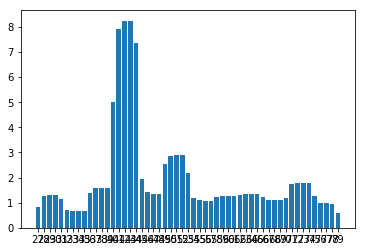

In [106]:
# 'SEM_adstock' by weekly
height = df_final_week['SEM_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

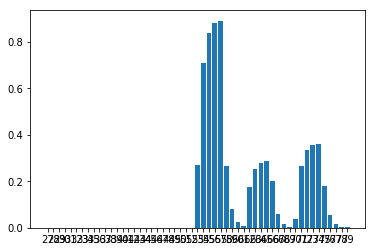

In [107]:
# 'Radio_adstock' by weekly
height = df_final_week['Radio_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

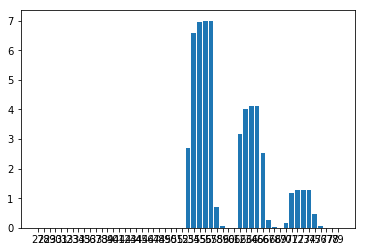

In [108]:
# 'Other_adstock' by weekly
height = df_final_week['Other_adstock']
bars = df_final_week['week']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
plt.show()

### Creating 3 dataframes for each product categories i.e. camera, Home audio and gaming accessory from final merged dataframe and converting those data into weekly data and doing EDA and model building on 3 seperate dataframes

In [109]:
df_final['product_analytic_sub_category'].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [110]:
df_final_camera = df_final[(df_final['product_analytic_sub_category'] == 'CameraAccessory')]
df_final_enter = df_final[(df_final['product_analytic_sub_category'] == 'HomeAudio')]
df_final_gamhard = df_final[(df_final['product_analytic_sub_category'] == 'GamingAccessory')]

In [111]:
print(df_final_camera.shape)
print(df_final_gamhard.shape)
print(df_final_enter.shape)

(231367, 33)
(197806, 33)
(119440, 33)


### Analysing for category Camera Accessory

In [112]:
print(df_final_camera.columns)
df_final_camera.head()

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_procurement_sla', 'order_date_new', 'payment_type_COD',
       'discount', 'discount_percentage', 'week_number', 'special_day_flag',
       'pay_flag', 'holiday_flag', 'weather_flag', 'week', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'ContentMarketing_adstock',
       'Onlinemarketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'NPS', 'Stock Index'],
      dtype='object')


,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
0,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
1,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
2,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,5,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
3,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,6,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
4,2015-10-17 14:18:03,2015,10,1.419270e+15,1.419270e+15,6670.0,1,9,CameraAccessory,CameraAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210


In [113]:
#Outlier treatment
df_final_camera = df_final_camera[np.abs(df_final_camera.sla-df_final_camera.sla.mean())<=(2*df_final_camera.sla.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.discount_percentage-df_final_camera.discount_percentage.mean())<=(2*df_final_camera.discount_percentage.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.product_procurement_sla-df_final_camera.product_procurement_sla.mean())<=(2*df_final_camera.product_procurement_sla.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.TV_adstock-df_final_camera.TV_adstock.mean())<=(2*df_final_camera.TV_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Digital_adstock-df_final_camera.Digital_adstock.mean())<=(2*df_final_camera.Digital_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Sponsorship_adstock-df_final_camera.Sponsorship_adstock.mean())<=(2*df_final_camera.Sponsorship_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.ContentMarketing_adstock-df_final_camera.ContentMarketing_adstock.mean())<=(2*df_final_camera.ContentMarketing_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Onlinemarketing_adstock-df_final_camera.Onlinemarketing_adstock.mean())<=(2*df_final_camera.Onlinemarketing_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Affiliates_adstock-df_final_camera.Affiliates_adstock.mean())<=(2*df_final_camera.Affiliates_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.SEM_adstock-df_final_camera.SEM_adstock.mean())<=(2*df_final_camera.SEM_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Radio_adstock-df_final_camera.Radio_adstock.mean())<=(2*df_final_camera.Radio_adstock.std())]
df_final_camera = df_final_camera[np.abs(df_final_camera.Other_adstock-df_final_camera.Other_adstock.mean())<=(2*df_final_camera.Other_adstock.std())]


In [114]:
df_final_camera.shape

(115753, 33)

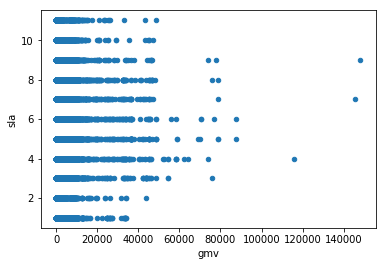

In [115]:
#Checking outliers with respect to 'gmv'
df_final_camera.plot.scatter('gmv','sla')

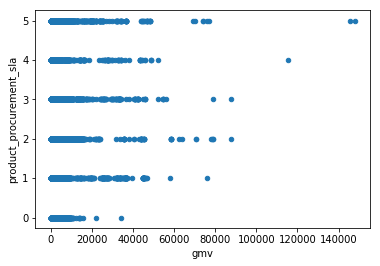

In [116]:
df_final_camera.plot.scatter('gmv','product_procurement_sla')

In [117]:
# All numeric (float and int) variables in the dataset
df_final_camera_num = df_final_camera.select_dtypes(include=['float64', 'int64', 'int32','int8','uint8'])
df_final_camera_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115753 entries, 209341 to 1293676
Data columns (total 28 columns):
Year                        115753 non-null int64
Month                       115753 non-null int64
order_id                    115753 non-null float64
order_item_id               115753 non-null float64
gmv                         115753 non-null float64
units                       115753 non-null int64
sla                         115753 non-null int64
product_procurement_sla     115753 non-null int64
payment_type_COD            115753 non-null uint8
discount                    115753 non-null float64
discount_percentage         115753 non-null float64
week_number                 115753 non-null int64
special_day_flag            115753 non-null int32
pay_flag                    115753 non-null int32
holiday_flag                115753 non-null int32
weather_flag                115753 non-null int32
week                        115753 non-null int64
TV_adstock             

In [118]:
df_final_camera_num = df_final_camera_num.drop('Year', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('Month', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('order_id', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('order_item_id', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('discount', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('week_number', axis=1)#not useful for annalysis
#df_final_camera_num = df_final_camera_num.drop('total_adstock', axis=1)#not useful for annalysis
df_final_camera_num = df_final_camera_num.drop('units', axis=1)#not useful for annalysis
#df_final_camera_num = df_final_camera_num.drop('week', axis=1)#not useful for annalysis

In [119]:
df_final_camera_num.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'payment_type_COD',
       'discount_percentage', 'special_day_flag', 'pay_flag', 'holiday_flag',
       'weather_flag', 'week', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'ContentMarketing_adstock',
       'Onlinemarketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'NPS', 'Stock Index'],
      dtype='object')

In [124]:
# converting into weekly data on camera dataframe
df_final_camera_week = pd.DataFrame(columns=[])
df_final_camera_week = df_final_camera_num.groupby(['week']).agg({'gmv':'mean','sla':'mean','weather_flag':'mean', 
                                                                  'discount_percentage':'mean','special_day_flag':'mean',
                                                                  'payment_type_COD':'mean','pay_flag':'mean',
                                                                  'product_procurement_sla':'mean','Stock Index':'mean',
                                                                  'NPS':'mean','Other_adstock':'mean','Radio_adstock':'mean',
                                                                  'SEM_adstock':'mean','Affiliates_adstock':'mean',
                                                                  'Onlinemarketing_adstock':'mean',
                                                                  'ContentMarketing_adstock':'mean','TV_adstock':'mean',
                                                                  'Digital_adstock':'mean','holiday_flag':'mean',
                                                                  'Sponsorship_adstock':'mean'}).reset_index()

df_final_camera_week.head()

,week,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,...,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,37,1357.326720,5.982837,0.441978,45.799063,0.000000,0.687136,0.000000,2.830578,1101.0,...,0.0,0.0,1.580837,1.272556,4.464702,0.160176,1.372158,0.392924,0.157456,19.696360
1,38,1427.836265,6.404939,0.299391,45.474614,0.000000,0.703315,0.133965,2.766915,1101.0,...,0.0,0.0,1.600444,1.298945,4.702240,0.165955,1.725505,0.394056,0.000000,22.480323
2,39,1332.694641,5.965285,0.149983,49.268760,0.000000,0.720930,0.000000,2.957196,1101.0,...,0.0,0.0,1.602405,1.301584,4.749748,0.166822,1.937513,0.394283,0.000000,23.593909
3,45,1176.119670,5.813128,0.095334,48.677482,0.464836,0.778075,0.000000,2.820496,1233.0,...,0.0,0.0,1.950660,1.712840,5.933801,0.164208,2.992854,0.954521,0.000000,15.426362
4,46,1223.196241,6.286622,0.191266,46.791805,0.886678,0.741846,0.113322,2.788834,1233.0,...,0.0,0.0,1.409492,1.705183,5.735964,0.063848,2.777254,0.487525,0.000000,9.466386


In [125]:
df_final_camera_week = df_final_camera_week.drop('week', axis=1)#not useful for annalysis
df_final_camera_week.head()

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,1357.326720,5.982837,0.441978,45.799063,0.000000,0.687136,0.000000,2.830578,1101.0,46.93,0.0,0.0,1.580837,1.272556,4.464702,0.160176,1.372158,0.392924,0.157456,19.696360
1,1427.836265,6.404939,0.299391,45.474614,0.000000,0.703315,0.133965,2.766915,1101.0,46.93,0.0,0.0,1.600444,1.298945,4.702240,0.165955,1.725505,0.394056,0.000000,22.480323
2,1332.694641,5.965285,0.149983,49.268760,0.000000,0.720930,0.000000,2.957196,1101.0,46.93,0.0,0.0,1.602405,1.301584,4.749748,0.166822,1.937513,0.394283,0.000000,23.593909
3,1176.119670,5.813128,0.095334,48.677482,0.464836,0.778075,0.000000,2.820496,1233.0,47.00,0.0,0.0,1.950660,1.712840,5.933801,0.164208,2.992854,0.954521,0.000000,15.426362
4,1223.196241,6.286622,0.191266,46.791805,0.886678,0.741846,0.113322,2.788834,1233.0,47.00,0.0,0.0,1.409492,1.705183,5.735964,0.063848,2.777254,0.487525,0.000000,9.466386


In [126]:
cor1 = df_final_camera_week.corr()
cor1

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
gmv,1.000000,0.405663,0.041230,-0.806729,0.140373,0.236248,-0.109077,0.785130,-0.334224,-0.603663,-0.236176,-0.414135,0.420719,-0.185524,-0.165401,0.111210,-0.126863,0.273950,0.162879,0.416120
sla,0.405663,1.000000,0.100879,-0.529718,0.157076,0.463491,0.284424,0.457666,-0.210496,-0.327726,-0.138516,-0.255414,0.134564,-0.074986,-0.089515,0.178092,-0.164148,0.311922,0.020288,0.112546
weather_flag,0.041230,0.100879,1.000000,-0.042761,0.035394,0.187249,-0.317881,-0.093420,0.192805,-0.102680,-0.152258,0.063859,-0.098547,-0.028916,0.097100,0.139334,-0.508110,-0.203557,0.188293,-0.097690
discount_percentage,-0.806729,-0.529718,-0.042761,1.000000,-0.256745,-0.271017,-0.118344,-0.835172,0.326738,0.402756,0.214754,0.547005,-0.195603,0.116201,0.241079,-0.033177,0.045522,-0.510449,-0.272535,-0.144649
special_day_flag,0.140373,0.157076,0.035394,-0.256745,1.000000,0.242935,0.120635,0.203628,-0.116220,-0.266764,0.229656,0.202241,0.283833,0.419224,0.351050,0.280997,0.052473,0.373279,0.545235,0.023037
payment_type_COD,0.236248,0.463491,0.187249,-0.271017,0.242935,1.000000,0.063288,0.258297,-0.291787,-0.676213,0.249591,0.314950,0.476923,0.462148,0.557938,0.688535,-0.498154,0.400165,0.154592,0.023400
pay_flag,-0.109077,0.284424,-0.317881,-0.118344,0.120635,0.063288,1.000000,0.028854,-0.395874,-0.035139,0.273127,0.100618,0.204024,0.093789,0.052454,0.138037,0.219194,0.214782,0.083168,0.092521
product_procurement_sla,0.785130,0.457666,-0.093420,-0.835172,0.203628,0.258297,0.028854,1.000000,-0.225256,-0.523776,-0.371048,-0.561812,0.300887,-0.257235,-0.278434,0.074324,-0.129786,0.409327,0.171950,0.368748
Stock Index,-0.334224,-0.210496,0.192805,0.326738,-0.116220,-0.291787,-0.395874,-0.225256,1.000000,0.324939,-0.669664,-0.169879,-0.335049,0.192547,0.167196,-0.297278,-0.277318,-0.456547,-0.278194,-0.586503
NPS,-0.603663,-0.327726,-0.102680,0.402756,-0.266764,-0.676213,-0.035139,-0.523776,0.324939,1.000000,-0.065374,-0.138811,-0.787562,-0.239505,-0.417885,-0.579571,0.383435,-0.217397,-0.271348,-0.503410


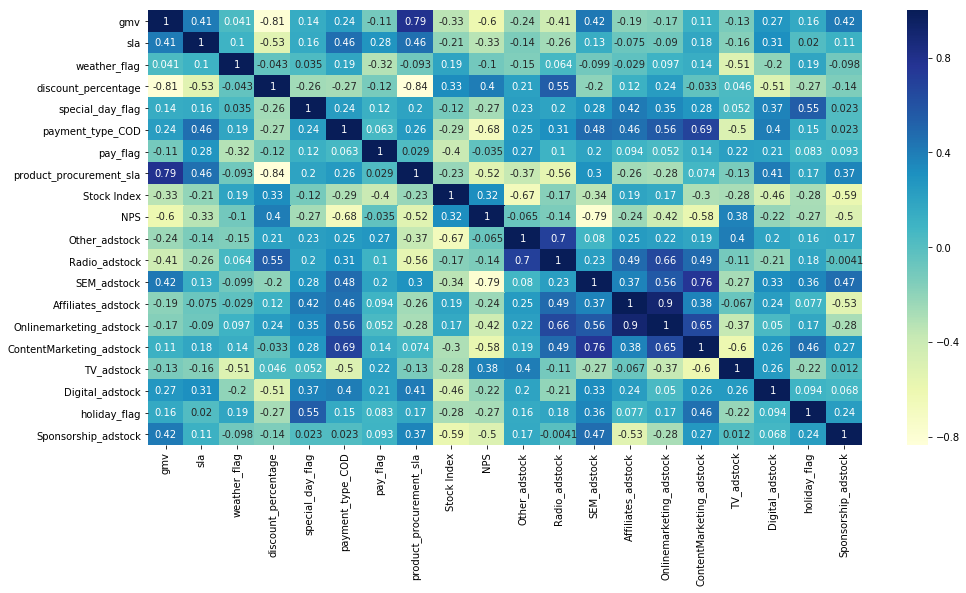

In [127]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

In [128]:
#Droping highly correlated columns
df_final_camera_week = df_final_camera_week.drop('SEM_adstock', axis=1)
df_final_camera_week = df_final_camera_week.drop('Affiliates_adstock', axis=1)
df_final_camera_week = df_final_camera_week.drop('ContentMarketing_adstock', axis=1)
df_final_camera_week = df_final_camera_week.drop('Other_adstock', axis=1)

In [129]:
df_final_camera_week.columns

Index(['gmv', 'sla', 'weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag', 'product_procurement_sla',
       'Stock Index', 'NPS', 'Radio_adstock', 'Onlinemarketing_adstock',
       'TV_adstock', 'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock'],
      dtype='object')

In [130]:
# creating information value and WOE for camera dataframe

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [131]:
iv, woe = iv_woe(data = df_final_camera_week, target = 'gmv', bins=10, show_woe = True)

Information value of sla is 0.0
  Variable          Cutoff  N       Events  % of Events   Non-Events  \
0      sla  (4.689, 5.554]  3  3245.072073     0.119513 -3242.072073   
1      sla  (5.554, 5.713]  2  1821.115928     0.067070 -1819.115928   
2      sla  (5.713, 5.749]  2  2147.042896     0.079073 -2145.042896   
3      sla  (5.749, 5.787]  3  3186.097255     0.117341 -3183.097255   
4      sla  (5.787, 5.828]  2  2153.961067     0.079328 -2151.961067   
5      sla  (5.828, 5.947]  2  2168.969678     0.079881 -2166.969678   
6      sla  (5.947, 5.986]  3  3612.909914     0.133060 -3609.909914   
7      sla  (5.986, 6.041]  2  2729.194572     0.100513 -2727.194572   
8      sla  (6.041, 6.124]  2  1944.641864     0.071619 -1942.641864   
9      sla  (6.124, 6.405]  3  4143.515172     0.152601 -4140.515172   

   % of Non-Events  WoE  IV  
0        -0.000018  NaN NaN  
1        -0.000018  NaN NaN  
2        -0.000018  NaN NaN  
3        -0.000018  NaN NaN  
4        -0.000018  NaN N

        Variable            Cutoff   N        Events  % of Events  \
0  Radio_adstock  (-0.001, 0.0094]  10  12748.522472     0.469515   
1  Radio_adstock  (0.0094, 0.0311]   2   1935.648536     0.071288   
2  Radio_adstock  (0.0311, 0.0763]   2   1962.605463     0.072281   
3  Radio_adstock   (0.0763, 0.256]   3   3412.883202     0.125693   
4  Radio_adstock    (0.256, 0.268]   2   1826.641284     0.067273   
5  Radio_adstock    (0.268, 0.319]   2   2191.136079     0.080697   
6  Radio_adstock    (0.319, 0.363]   3   3075.083383     0.113252   

     Non-Events  % of Non-Events  WoE  IV  
0 -12738.522472        -0.000018  NaN NaN  
1  -1933.648536        -0.000018  NaN NaN  
2  -1960.605463        -0.000018  NaN NaN  
3  -3409.883202        -0.000018  NaN NaN  
4  -1824.641284        -0.000018  NaN NaN  
5  -2189.136079        -0.000018  NaN NaN  
6  -3072.083383        -0.000018  NaN NaN  
Information value of Onlinemarketing_adstock is 0.0
                  Variable                 

In [132]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,sla,"(4.689, 5.554]",3,3245.072073,0.119513,-3242.072073,-0.000018,NaN,NaN
1,sla,"(5.554, 5.713]",2,1821.115928,0.067070,-1819.115928,-0.000018,NaN,NaN
2,sla,"(5.713, 5.749]",2,2147.042896,0.079073,-2145.042896,-0.000018,NaN,NaN
3,sla,"(5.749, 5.787]",3,3186.097255,0.117341,-3183.097255,-0.000018,NaN,NaN
4,sla,"(5.787, 5.828]",2,2153.961067,0.079328,-2151.961067,-0.000018,NaN,NaN
5,sla,"(5.828, 5.947]",2,2168.969678,0.079881,-2166.969678,-0.000018,NaN,NaN
6,sla,"(5.947, 5.986]",3,3612.909914,0.133060,-3609.909914,-0.000018,NaN,NaN
7,sla,"(5.986, 6.041]",2,2729.194572,0.100513,-2727.194572,-0.000018,NaN,NaN
8,sla,"(6.041, 6.124]",2,1944.641864,0.071619,-1942.641864,-0.000018,NaN,NaN
9,sla,"(6.124, 6.405]",3,4143.515172,0.152601,-4140.515172,-0.000018,NaN,NaN


In [133]:
iv

,Variable,IV
0,sla,0.0
0,weather_flag,0.0
0,discount_percentage,0.0
0,special_day_flag,0.0
0,payment_type_COD,0.0
0,pay_flag,0.0
0,product_procurement_sla,0.0
0,Stock Index,0.0
0,NPS,0.0
0,Radio_adstock,0.0


### Model building 

#### Feature Scaling

In [134]:
# importing minmaxscalar package from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [136]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
number_variables = ['gmv', 'sla','weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag','product_procurement_sla', 'Stock Index', 'NPS', 
       'Radio_adstock', 'Onlinemarketing_adstock', 'TV_adstock','weather_flag', 
       'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock']

df_final_camera_week[number_variables] = scaler.fit_transform(df_final_camera_week[number_variables])

df_final_camera_week.head()

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Radio_adstock,Onlinemarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,0.759400,0.753820,0.567969,0.168033,0.000000,0.847761,0.000000,0.810679,0.378855,0.161781,0.0,0.000000,0.080596,0.231364,0.627167,0.805735
1,0.867787,1.000000,0.384736,0.145770,0.000000,0.868770,0.774019,0.715489,0.378855,0.161781,0.0,0.098672,0.183987,0.232914,0.000000,0.944496
2,0.721536,0.743582,0.192738,0.406110,0.000000,0.891643,0.000000,1.000000,0.378855,0.161781,0.0,0.118406,0.246021,0.233224,0.000000,1.000000
3,0.480850,0.654841,0.122510,0.365539,0.464836,0.965846,0.000000,0.795604,0.960352,0.173756,0.0,0.610253,0.554815,1.000000,0.000000,0.592907
4,0.553216,0.930995,0.245789,0.236151,0.886678,0.918802,0.654751,0.748263,0.960352,0.173756,0.0,0.528073,0.491731,0.360841,0.000000,0.295845


In [137]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(df_final_camera_week, train_size = 0.8, test_size = 0.2, random_state = 20)

In [138]:
df_test.columns

Index(['gmv', 'sla', 'weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag', 'product_procurement_sla',
       'Stock Index', 'NPS', 'Radio_adstock', 'Onlinemarketing_adstock',
       'TV_adstock', 'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock'],
      dtype='object')

In [139]:
# buliding model and removing target variable from y-train data set
y_train = df_train.pop('gmv')
X_train = df_train

In [140]:
# buliding model and removing target variable from y-test data set
y_test = df_test.pop('gmv')
X_test = df_test

 ### Buliding Linear model using RFE

In [141]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [142]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [143]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('sla', False, 5),
 ('weather_flag', False, 2),
 ('discount_percentage', True, 1),
 ('special_day_flag', False, 6),
 ('payment_type_COD', True, 1),
 ('pay_flag', True, 1),
 ('product_procurement_sla', True, 1),
 ('Stock Index', True, 1),
 ('NPS', True, 1),
 ('Radio_adstock', False, 3),
 ('Onlinemarketing_adstock', True, 1),
 ('TV_adstock', True, 1),
 ('Digital_adstock', False, 4),
 ('holiday_flag', True, 1),
 ('Sponsorship_adstock', True, 1)]

In [144]:
col = X_train.columns[rfe.support_]
col

Index(['discount_percentage', 'payment_type_COD', 'pay_flag',
       'product_procurement_sla', 'Stock Index', 'NPS',
       'Onlinemarketing_adstock', 'TV_adstock', 'holiday_flag',
       'Sponsorship_adstock'],
      dtype='object')

In [145]:
X_train.columns[~rfe.support_]

Index(['sla', 'weather_flag', 'special_day_flag', 'Radio_adstock',
       'Digital_adstock'],
      dtype='object')

In [146]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

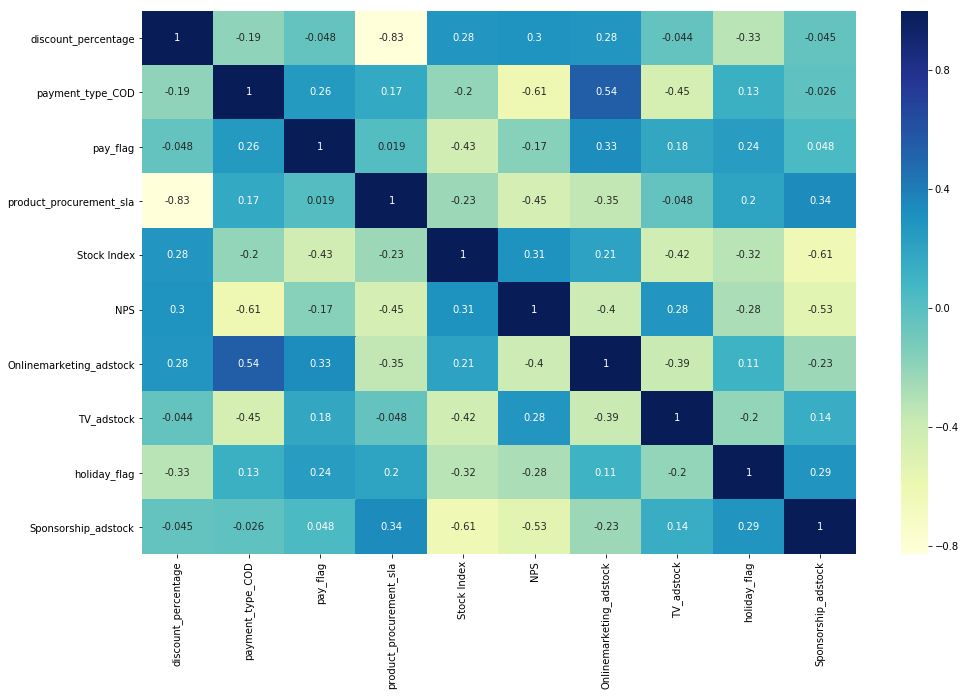

In [147]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [148]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [149]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [150]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     24.42
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.40e-05
Time:                        19:35:28   Log-Likelihood:                 28.629
No. Observations:                  19   AIC:                            -35.26
Df Residuals:                       8   BIC:                            -24.87
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [151]:
X_train_new_1 = X_train_rfe.drop(["product_procurement_sla"], axis = 1)

In [152]:
X_train_lm = sm.add_constant(X_train_new_1)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     29.20
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.32e-05
Time:                        19:36:11   Log-Likelihood:                 28.222
No. Observations:                  19   AIC:                            -36.44
Df Residuals:                       9   BIC:                            -27.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [153]:
X_train_new_2 = X_train_new_1.drop(["Sponsorship_adstock"], axis = 1)

In [154]:
X_train_lm = sm.add_constant(X_train_new_2)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     32.41
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.60e-06
Time:                        19:36:36   Log-Likelihood:                 27.133
No. Observations:                  19   AIC:                            -36.27
Df Residuals:                      10   BIC:                            -27.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [155]:
X_train_new_2 = X_train_new_2.drop(["const"], axis = 1)

In [156]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Onlinemarketing_adstock,13.82
3,Stock Index,9.31
1,payment_type_COD,8.07
0,discount_percentage,6.14
4,NPS,6.07
6,TV_adstock,3.30
2,pay_flag,2.58
7,holiday_flag,1.43


In [157]:
X_train_new_3 = X_train_new_2.drop(["Onlinemarketing_adstock"], axis = 1)

In [158]:
X_train_lm = sm.add_constant(X_train_new_3)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     22.53
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.10e-05
Time:                        19:38:15   Log-Likelihood:                 21.784
No. Observations:                  19   AIC:                            -27.57
Df Residuals:                      11   BIC:                            -20.01
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7643    

In [159]:
X_train_new_4 = X_train_new_3.drop(["pay_flag"], axis = 1)

In [160]:
X_train_lm = sm.add_constant(X_train_new_4)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     23.19
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.09e-06
Time:                        19:38:31   Log-Likelihood:                 19.915
No. Observations:                  19   AIC:                            -25.83
Df Residuals:                      12   BIC:                            -19.22
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8116    

In [161]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Stock Index,5.88
1,payment_type_COD,5.31
3,NPS,4.60
0,discount_percentage,4.55
4,TV_adstock,3.18
5,holiday_flag,1.33


In [162]:
X_train_new_5 = X_train_new_4.drop(["Stock Index"], axis = 1)

In [163]:
X_train_lm = sm.add_constant(X_train_new_5)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     17.27
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.46e-05
Time:                        19:39:26   Log-Likelihood:                 15.168
No. Observations:                  19   AIC:                            -18.34
Df Residuals:                      13   BIC:                            -12.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.4044    

In [164]:
X_train_new_6 = X_train_new_5.drop(["TV_adstock"], axis = 1)

In [165]:
X_train_lm = sm.add_constant(X_train_new_6)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.66
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.42e-06
Time:                        19:39:46   Log-Likelihood:                 14.957
No. Observations:                  19   AIC:                            -19.91
Df Residuals:                      14   BIC:                            -15.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3432    

In [166]:
X_train_new_7 = X_train_new_6.drop(["holiday_flag"], axis = 1)

In [167]:
X_train_lm = sm.add_constant(X_train_new_7)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.56e-06
Time:                        19:40:17   Log-Likelihood:                 12.814
No. Observations:                  19   AIC:                            -17.63
Df Residuals:                      15   BIC:                            -13.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2556    

In [168]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,discount_percentage,4.06
1,payment_type_COD,2.67
2,NPS,2.56


In [169]:
y_train_gmv = lm.predict(X_train_lm)

In [170]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

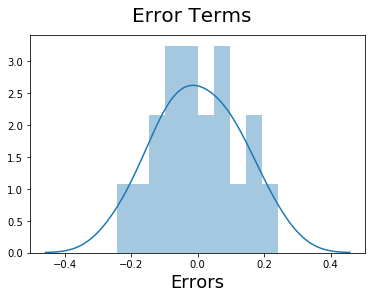

In [171]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_gmv), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [172]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [173]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

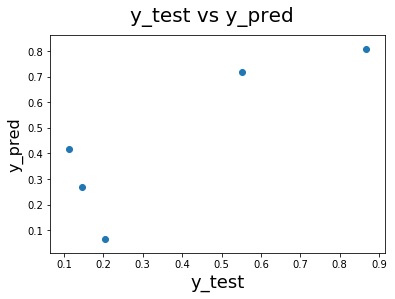

In [174]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [175]:
from sklearn.metrics import r2_score

In [176]:
r2_score(y_test, y_pred)

0.6292244192091175

#### So R2 value is 62%

### Multiplicative Model

In [240]:
from sklearn.preprocessing import StandardScaler
df_final_camera_num= np.log(df_final_camera_week)
df_final_camera_num=df_final_camera_week.fillna(0)
df_final_camera_num = df_final_camera_week.replace([np.inf,-np.inf],0)
names= df_final_camera_week.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final_camera_week)
scaled_df = pd.DataFrame(scaled_df,columns=names)
X = scaled_df.drop(columns= ['gmv'])
y = scaled_df['gmv']
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

**Feature selection with p value**

In [241]:
def stepwise_selection(X, y,initial_list = ['sla','weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag','product_procurement_sla', 'Stock Index', 'NPS', 
       'Radio_adstock', 'Onlinemarketing_adstock', 'TV_adstock', 
       'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock'],
                      threshold_in=0.0001,
                      threshold_out = 0.01,
                      verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [242]:
result = stepwise_selection(x_train,y_train)
print('resulting features:')
print(result)

Drop Stock Index                    with p-value 0.983988
Drop NPS                            with p-value 0.740714
Drop Onlinemarketing_adstock        with p-value 0.632042
Drop Radio_adstock                  with p-value 0.714501
Drop special_day_flag               with p-value 0.272809
Drop holiday_flag                   with p-value 0.443196
Drop product_procurement_sla        with p-value 0.366086
Drop sla                            with p-value 0.100714
Drop weather_flag                   with p-value 0.13063
Drop TV_adstock                     with p-value 0.0259488
Drop payment_type_COD               with p-value 0.274126
Drop Digital_adstock                with p-value 0.117609
resulting features:
['discount_percentage', 'pay_flag', 'Sponsorship_adstock']


In [243]:
x_train1 = x_train.loc[:,['discount_percentage', 'pay_flag', 'Sponsorship_adstock']]
model_ols = sm.OLS(y_train,x_train1)
results = model_ols.fit()
results.params
print(results.summary())
x_cv2 = x_cv.loc[:,['discount_percentage', 'pay_flag', 'Sponsorship_adstock']]
results.predict(x_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     35.45
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.75e-07
Time:                        19:48:53   Log-Likelihood:                -6.7119
No. Observations:                  18   AIC:                             19.42
Df Residuals:                      15   BIC:                             22.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
discount_percentage    -0.7544    

7     0.441005
10    0.597415
3     0.866521
20   -1.073547
23   -0.493702
18   -0.400107
dtype: float64

In [244]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

0.717068518858293

In [245]:
# mse

mse = np.mean((results.predict(x_cv2)-y_cv)**2)
mse

0.5141872607376262

### Distributive lag model

In [246]:
df_final_camera_week_lag = df_final_camera_week.copy()
df_final_camera_week_lag['gmv1']=df_final_camera_week['gmv'].shift(-1)
df_final_camera_week_lag['gmv2']=df_final_camera_week['gmv'].shift(-2)
df_final_camera_week_lag['gmv3']=df_final_camera_week['gmv'].shift(-3)

In [247]:
df_final_camera_week_lag = df_final_camera_week_lag.fillna(0)
df_final_camera_week_lag = df_final_camera_week_lag.replace([np.inf,-np.inf],0)

In [257]:
# colnames
cols = df_final_camera_week_lag.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_camera_week_lag)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X,scaled_df1.gmv)

In [258]:
dlag_result=stepwise_selection(x_train1,y_train1)
print(dlag_result)

Drop weather_flag                   with p-value 0.955261
Drop product_procurement_sla        with p-value 0.879792
Drop Stock Index                    with p-value 0.43213
Drop Onlinemarketing_adstock        with p-value 0.691102
Drop sla                            with p-value 0.253854
Drop Radio_adstock                  with p-value 0.128281
Drop NPS                            with p-value 0.348786
Drop special_day_flag               with p-value 0.194841
Drop holiday_flag                   with p-value 0.340228
Drop TV_adstock                     with p-value 0.0173154
Drop payment_type_COD               with p-value 0.395959
Drop Digital_adstock                with p-value 0.17287
['discount_percentage', 'pay_flag', 'Sponsorship_adstock']


In [259]:
x_train_1 = x_train1.loc[:,['discount_percentage', 'pay_flag', 'Sponsorship_adstock']]
model1_ols1 = sm.OLS(y_train1,x_train_1)
results1 = model1_ols1.fit()
results1.params
print(results1.summary())
dlag_cv2 = x_cv1.loc[:,['discount_percentage', 'pay_flag', 'Sponsorship_adstock']]
results1.predict(dlag_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     36.08
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.23e-07
Time:                        19:50:13   Log-Likelihood:                -6.3712
No. Observations:                  18   AIC:                             18.74
Df Residuals:                      15   BIC:                             21.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
discount_percentage    -0.7591    

9    -1.022931
7     0.444202
12   -0.662461
5     0.724037
3     0.862813
23   -0.500381
dtype: float64

In [260]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(dlag_cv2)-y_cv1))))
rmse

0.7259354713757655

In [261]:
# mse
mse = np.mean((results1.predict(dlag_cv2)-y_cv1)**2)
mse

0.5269823086015549

### KOYCK Model

In [273]:
df_final_camera_week_koyck = df_final_camera_week.copy()
df_final_camera_week_koyck['gmv1'] = df_final_camera_week_koyck['gmv'].shift(-1)

In [274]:
df_final_camera_week_koyck = df_final_camera_week_koyck.fillna(0)
df_final_camera_week_koyck = df_final_camera_week_koyck.replace([np.inf,-np.inf],0)

In [279]:
# colnames
cols = df_final_camera_week_koyck.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_camera_week_koyck)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train2, x_cv2, y_train2, y_cv2 = train_test_split(X,scaled_df1.gmv)

In [280]:
koyck_result=stepwise_selection(x_train2,y_train2)
print(koyck_result)

Drop Radio_adstock                  with p-value 0.964292
Drop NPS                            with p-value 0.63636
Drop sla                            with p-value 0.30183
Drop holiday_flag                   with p-value 0.110886
Drop special_day_flag               with p-value 0.0890559
Drop TV_adstock                     with p-value 0.0290922
Drop Stock Index                    with p-value 0.2394
Drop product_procurement_sla        with p-value 0.117317
Drop Onlinemarketing_adstock        with p-value 0.27911
Drop payment_type_COD               with p-value 0.437078
Drop weather_flag                   with p-value 0.0579072
['discount_percentage', 'pay_flag', 'Digital_adstock', 'Sponsorship_adstock']


In [281]:
x_train_2 = x_train2.loc[:,['discount_percentage', 'pay_flag', 'Digital_adstock', 'Sponsorship_adstock']]
model_1 = sm.OLS(y_train2,x_train_2)
results1 = model_1.fit()
results1.params
print(results1.summary())
koyck_cv2 = x_cv2.loc[:,['discount_percentage', 'pay_flag', 'Digital_adstock', 'Sponsorship_adstock']]
results1.predict(koyck_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.78
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.69e-07
Time:                        19:52:45   Log-Likelihood:                -3.0026
No. Observations:                  18   AIC:                             14.01
Df Residuals:                      14   BIC:                             17.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
discount_percentage    -0.9397    

15   -1.193914
0     2.003214
9    -1.223795
23   -0.385712
7     0.264590
21   -1.632788
dtype: float64

In [282]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(koyck_cv2)-y_cv2))))
rmse

0.817752280170642

In [283]:
# mse

mse = np.mean((results1.predict(koyck_cv2)-y_cv2)**2)
mse

0.6687187917242842

### Analysing for category Gaming Accessory

In [284]:
print(df_final_gamhard.columns)
df_final_gamhard.head()

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_procurement_sla', 'order_date_new', 'payment_type_COD',
       'discount', 'discount_percentage', 'week_number', 'special_day_flag',
       'pay_flag', 'holiday_flag', 'weather_flag', 'week', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'ContentMarketing_adstock',
       'Onlinemarketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'NPS', 'Stock Index'],
      dtype='object')


,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_analytic_category,product_analytic_sub_category,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
175,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,5,GamingHardware,GamingAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
176,2015-10-17 22:36:08,2015,10,3.419568e+15,3.419568e+15,3079.0,1,6,GamingHardware,GamingAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
177,2015-10-17 22:33:02,2015,10,4.419567e+15,4.419567e+15,2899.0,1,5,GamingHardware,GamingAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
178,2015-10-17 08:41:53,2015,10,1.419067e+15,1.419067e+15,1310.0,1,9,GamingHardware,GamingAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210
179,2015-10-17 12:15:01,2015,10,2.419195e+15,2.419195e+15,1310.0,1,9,GamingHardware,GamingAccessory,...,3.598211,31.879422,0.933319,7.034278,1.799563,8.217587,0.0,0.0,44.4,1210


In [285]:
df_final_gamhard.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_procurement_sla,payment_type_COD,discount,...,Digital_adstock,Sponsorship_adstock,ContentMarketing_adstock,Onlinemarketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index
count,197806.000000,197806.000000,1.978060e+05,1.978060e+05,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,...,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000,197806.000000
mean,2015.548628,6.383952,2.854999e+15,1.337991e+16,858.294699,1.034433,5.679312,2.523205,0.755366,1224.141208,...,0.797217,13.566125,0.226894,5.358714,1.499896,2.229814,0.149547,1.182164,48.215737,1151.614622
std,0.497631,3.654090,1.264724e+15,5.497693e+16,1320.868749,0.277047,2.534160,1.870628,0.429871,5328.863110,...,0.954646,8.545396,0.250485,1.688830,0.442928,2.060516,0.241917,2.101739,2.590992,83.848897
min,2015.000000,1.000000,1.629576e+08,2.072001e+08,39.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.133355,0.463282,0.000002,0.038000,0.019049,0.592968,0.000000,0.000000,44.400000,1015.000000
25%,2015.000000,3.000000,1.606219e+15,1.609646e+15,285.000000,1.000000,4.000000,2.000000,1.000000,204.000000,...,0.300373,7.249152,0.067839,4.803671,1.471260,1.241940,0.000000,0.000000,46.930000,1052.000000
50%,2016.000000,6.000000,2.614896e+15,2.621648e+15,449.000000,1.000000,6.000000,2.000000,1.000000,475.000000,...,0.471473,11.880887,0.165142,5.789658,1.672886,1.349963,0.016374,0.004602,47.310000,1194.000000
75%,2016.000000,10.000000,3.613012e+15,4.398842e+15,987.250000,1.000000,7.000000,3.000000,1.000000,810.000000,...,0.723718,18.877611,0.246892,6.641752,1.763930,1.950660,0.267267,1.287508,50.330000,1228.000000
max,2016.000000,12.000000,4.641665e+15,3.000373e+17,100000.000000,15.000000,60.000000,14.000000,1.000000,244755.000000,...,3.655103,32.443055,0.940946,7.074711,1.904384,8.246645,0.891924,6.999570,59.990000,1242.000000


In [286]:
#Outlier treatment
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.sla-df_final_gamhard.sla.mean())<=(2*df_final_gamhard.sla.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.discount_percentage-df_final_gamhard.discount_percentage.mean())<=(2*df_final_gamhard.discount_percentage.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.product_procurement_sla-df_final_gamhard.product_procurement_sla.mean())<=(2*df_final_gamhard.product_procurement_sla.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.TV_adstock-df_final_gamhard.TV_adstock.mean())<=(2*df_final_gamhard.TV_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Digital_adstock-df_final_gamhard.Digital_adstock.mean())<=(2*df_final_gamhard.Digital_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Sponsorship_adstock-df_final_gamhard.Sponsorship_adstock.mean())<=(2*df_final_gamhard.Sponsorship_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.ContentMarketing_adstock-df_final_gamhard.ContentMarketing_adstock.mean())<=(2*df_final_gamhard.ContentMarketing_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Onlinemarketing_adstock-df_final_gamhard.Onlinemarketing_adstock.mean())<=(2*df_final_gamhard.Onlinemarketing_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Affiliates_adstock-df_final_gamhard.Affiliates_adstock.mean())<=(2*df_final_gamhard.Affiliates_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.SEM_adstock-df_final_gamhard.SEM_adstock.mean())<=(2*df_final_gamhard.SEM_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Radio_adstock-df_final_gamhard.Radio_adstock.mean())<=(2*df_final_gamhard.Radio_adstock.std())]
df_final_gamhard = df_final_gamhard[np.abs(df_final_gamhard.Other_adstock-df_final_gamhard.Other_adstock.mean())<=(2*df_final_gamhard.Other_adstock.std())]
df_final_gamhard.shape

(98282, 33)

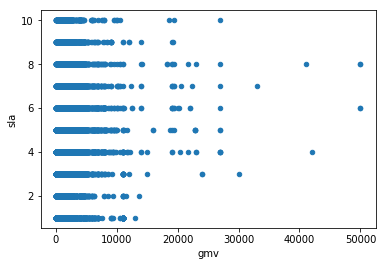

In [287]:
#Checking outliers with respect to 'gmv'
df_final_gamhard.plot.scatter('gmv','sla')

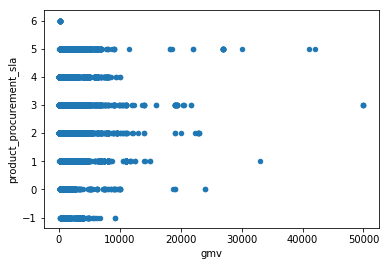

In [288]:
df_final_gamhard.plot.scatter('gmv','product_procurement_sla')

In [289]:
# All numeric (float and int) variables in the dataset
df_final_gamhard_num = df_final_gamhard.select_dtypes(include=['float64', 'int64', 'int32','int8','uint8'])
df_final_gamhard_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98282 entries, 209342 to 1292972
Data columns (total 28 columns):
Year                        98282 non-null int64
Month                       98282 non-null int64
order_id                    98282 non-null float64
order_item_id               98282 non-null float64
gmv                         98282 non-null float64
units                       98282 non-null int64
sla                         98282 non-null int64
product_procurement_sla     98282 non-null int64
payment_type_COD            98282 non-null uint8
discount                    98282 non-null float64
discount_percentage         98282 non-null float64
week_number                 98282 non-null int64
special_day_flag            98282 non-null int32
pay_flag                    98282 non-null int32
holiday_flag                98282 non-null int32
weather_flag                98282 non-null int32
week                        98282 non-null int64
TV_adstock                  98282 non-nul

In [290]:
df_final_gamhard_num = df_final_gamhard_num.drop('Year', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('Month', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('order_id', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('order_item_id', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('discount', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('week_number', axis=1)#not useful for annalysis
#df_final_gamhard_num = df_final_gamhard_num.drop('total_adstock', axis=1)#not useful for annalysis
df_final_gamhard_num = df_final_gamhard_num.drop('units', axis=1)#not useful for annalysis
#df_final_gamhard_num = df_final_gamhard_num.drop('week', axis=1)#not useful for annalysis

In [291]:
df_final_gamhard_num.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'payment_type_COD',
       'discount_percentage', 'special_day_flag', 'pay_flag', 'holiday_flag',
       'weather_flag', 'week', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'ContentMarketing_adstock',
       'Onlinemarketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'NPS', 'Stock Index'],
      dtype='object')

In [292]:
#Converting to weekly data
df_final_gamhard_week = pd.DataFrame(columns=[])
df_final_gamhard_week = df_final_gamhard_num.groupby(['week']).agg({'gmv':'mean','sla':'mean','weather_flag':'mean', 'discount_percentage':'mean','special_day_flag':'mean','payment_type_COD':'mean','pay_flag':'mean','product_procurement_sla':'mean','Stock Index':'mean','NPS':'mean','Other_adstock':'mean','Radio_adstock':'mean','SEM_adstock':'mean','Affiliates_adstock':'mean','Onlinemarketing_adstock':'mean','ContentMarketing_adstock':'mean','TV_adstock':'mean','Digital_adstock':'mean','holiday_flag':'mean','Sponsorship_adstock':'mean'}).reset_index()
print(df_final_gamhard_week.shape)
df_final_gamhard_week = df_final_gamhard_week.drop('week', axis=1)#not useful for annalysis
df_final_gamhard_week.head()

(24, 21)


,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,972.920461,5.291237,0.427646,37.482906,0.000000,0.775147,0.000000,2.454564,1101.0,46.93,0.0,0.0,1.580837,1.272556,4.464702,0.160176,1.372158,0.392924,0.153815,19.696360
1,1017.976584,5.553627,0.289358,38.436460,0.000000,0.760610,0.124399,2.432992,1101.0,46.93,0.0,0.0,1.600444,1.298945,4.702240,0.165955,1.725505,0.394056,0.000000,22.480323
2,966.763022,5.728032,0.172167,39.404688,0.000000,0.785686,0.000000,2.302982,1101.0,46.93,0.0,0.0,1.602405,1.301584,4.749748,0.166822,1.937513,0.394283,0.000000,23.593909
3,758.220930,4.913288,0.219124,45.228599,0.276541,0.810171,0.000000,2.305367,1233.0,47.00,0.0,0.0,1.950660,1.712840,5.933801,0.164208,2.992854,0.954521,0.000000,15.426362
4,753.942935,5.713164,0.171800,41.728297,0.853865,0.813708,0.146135,2.233696,1233.0,47.00,0.0,0.0,1.409492,1.705183,5.735964,0.063848,2.777254,0.487525,0.000000,9.466386


In [293]:
cor1 = df_final_gamhard_week.corr()
cor1

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
gmv,1.000000,0.165630,0.078068,-0.546257,-0.294074,-0.583773,-0.111343,-0.068731,-0.059647,0.094066,-0.046910,0.007941,-0.046647,-0.618556,-0.440268,-0.250739,0.216900,-0.532630,-0.028944,0.585913
sla,0.165630,1.000000,-0.088384,-0.158738,-0.107932,0.103877,0.332003,0.023911,0.021695,-0.106510,-0.104212,0.028798,0.116855,0.043894,0.098195,0.082774,-0.061029,-0.238575,-0.041662,0.016831
weather_flag,0.078068,-0.088384,1.000000,-0.048374,0.001908,0.142740,-0.397373,-0.255704,0.226275,-0.110448,-0.191021,0.024910,-0.077035,-0.045451,0.066881,0.093748,-0.434576,-0.159031,0.105773,-0.053197
discount_percentage,-0.546257,-0.158738,-0.048374,1.000000,0.217927,0.165683,-0.062661,-0.239837,0.268130,0.227190,0.284170,0.523392,-0.026691,0.652911,0.648696,0.284495,-0.214936,-0.030512,0.089172,-0.544991
special_day_flag,-0.294074,-0.107932,0.001908,0.217927,1.000000,0.251001,0.192450,-0.125967,-0.158525,-0.215025,0.284383,0.246615,0.225392,0.406164,0.337845,0.276268,0.048931,0.321725,0.591889,-0.018892
payment_type_COD,-0.583773,0.103877,0.142740,0.165683,0.251001,1.000000,0.087462,-0.141994,-0.326370,-0.713574,0.240742,0.284329,0.500680,0.436420,0.533880,0.688239,-0.496513,0.413593,0.175001,0.061623
pay_flag,-0.111343,0.332003,-0.397373,-0.062661,0.192450,0.087462,1.000000,0.208996,-0.344001,-0.033455,0.241577,0.110665,0.193235,0.138319,0.084899,0.139878,0.224135,0.221137,0.113277,0.043527
product_procurement_sla,-0.068731,0.023911,-0.255704,-0.239837,-0.125967,-0.141994,0.208996,1.000000,-0.328835,0.411599,0.108325,-0.353553,-0.404381,-0.327874,-0.548645,-0.292673,0.449894,0.360942,-0.042111,-0.116768
Stock Index,-0.059647,0.021695,0.226275,0.268130,-0.158525,-0.326370,-0.344001,-0.328835,1.000000,0.325437,-0.670105,-0.169455,-0.334884,0.190795,0.166199,-0.296604,-0.277226,-0.457506,-0.266607,-0.583876
NPS,0.094066,-0.106510,-0.110448,0.227190,-0.215025,-0.713574,-0.033455,0.411599,0.325437,1.000000,-0.066675,-0.139145,-0.788169,-0.240002,-0.418120,-0.580002,0.382786,-0.218330,-0.259164,-0.503503


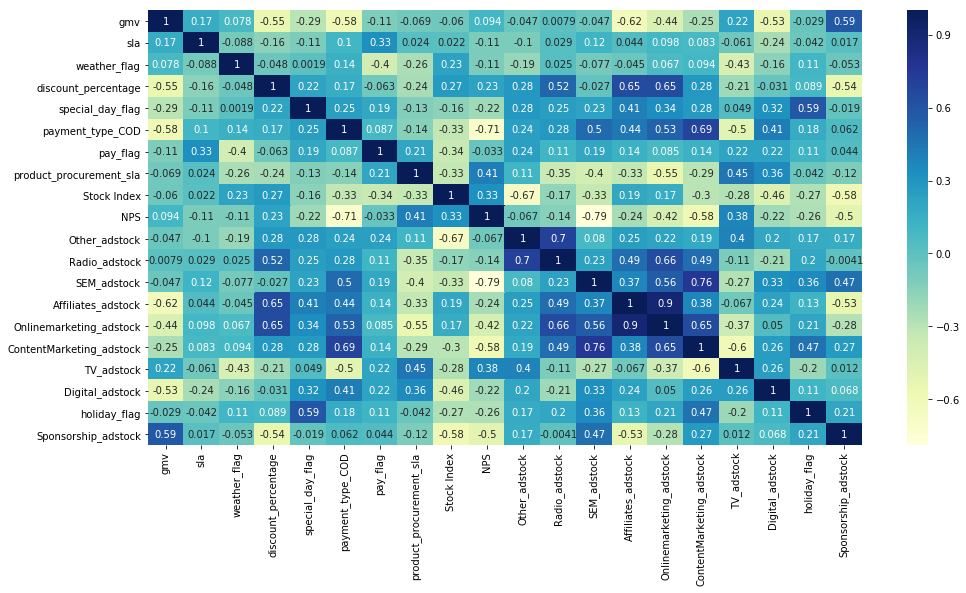

In [294]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

In [295]:
#Droping highly correlated columns
#df_final_gamhard_week = df_final_gamhard_week.drop('Sponsorship_adstock', axis=1)
#df_final_gamhard_week = df_final_gamhard_week.drop('Affiliates_adstock', axis=1)
#df_final_gamhard_week = df_final_gamhard_week.drop('Stock Index', axis=1)
#df_final_gamhard_week = df_final_gamhard_week.drop('Other_adstock', axis=1)
#df_final_gamhard_week = df_final_gamhard_week.drop('product_procurement_sla', axis=1)

df_final_gamhard_week = df_final_gamhard_week.drop('SEM_adstock', axis=1)
df_final_gamhard_week = df_final_gamhard_week.drop('Affiliates_adstock', axis=1)
df_final_gamhard_week = df_final_gamhard_week.drop('ContentMarketing_adstock', axis=1)
df_final_gamhard_week = df_final_gamhard_week.drop('Other_adstock', axis=1)

In [296]:
iv, woe = iv_woe(data = df_final_gamhard_week, target = 'gmv', bins=10, show_woe = True)

Information value of sla is 0.0
  Variable                      Cutoff  N       Events  % of Events  \
0      sla  (4.566999999999999, 5.073]  3  2517.461273     0.122918   
1      sla               (5.073, 5.29]  2  1592.726276     0.077767   
2      sla               (5.29, 5.421]  2  1711.321703     0.083557   
3      sla              (5.421, 5.498]  3  2448.313335     0.119542   
4      sla              (5.498, 5.558]  2  1852.935320     0.090472   
5      sla              (5.558, 5.592]  2  1575.743613     0.076938   
6      sla              (5.592, 5.633]  3  2454.413425     0.119840   
7      sla              (5.633, 5.718]  2  1571.535930     0.076732   
8      sla              (5.718, 5.739]  2  1916.716813     0.093586   
9      sla              (5.739, 6.096]  3  2839.626695     0.138648   

    Non-Events  % of Non-Events  WoE  IV  
0 -2514.461273        -0.000024  NaN NaN  
1 -1590.726276        -0.000024  NaN NaN  
2 -1709.321703        -0.000024  NaN NaN  
3 -2445.313335

Information value of Radio_adstock is 0.0
        Variable            Cutoff   N       Events  % of Events   Non-Events  \
0  Radio_adstock  (-0.001, 0.0094]  10  8441.833888     0.412183 -8431.833888   
1  Radio_adstock  (0.0094, 0.0311]   2  1680.362204     0.082046 -1678.362204   
2  Radio_adstock  (0.0311, 0.0763]   2  2016.707211     0.098468 -2014.707211   
3  Radio_adstock   (0.0763, 0.256]   3  2297.727158     0.112189 -2294.727158   
4  Radio_adstock    (0.256, 0.268]   2  1705.823254     0.083289 -1703.823254   
5  Radio_adstock    (0.268, 0.319]   2  1726.910312     0.084319 -1724.910312   
6  Radio_adstock    (0.319, 0.363]   3  2611.430357     0.127506 -2608.430357   

   % of Non-Events  WoE  IV  
0        -0.000024  NaN NaN  
1        -0.000024  NaN NaN  
2        -0.000024  NaN NaN  
3        -0.000024  NaN NaN  
4        -0.000024  NaN NaN  
5        -0.000024  NaN NaN  
6        -0.000024  NaN NaN  
Information value of Onlinemarketing_adstock is 0.0
                 

In [297]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,sla,"(4.566999999999999, 5.073]",3,2517.461273,0.122918,-2514.461273,-0.000024,NaN,NaN
1,sla,"(5.073, 5.29]",2,1592.726276,0.077767,-1590.726276,-0.000024,NaN,NaN
2,sla,"(5.29, 5.421]",2,1711.321703,0.083557,-1709.321703,-0.000024,NaN,NaN
3,sla,"(5.421, 5.498]",3,2448.313335,0.119542,-2445.313335,-0.000024,NaN,NaN
4,sla,"(5.498, 5.558]",2,1852.935320,0.090472,-1850.935320,-0.000024,NaN,NaN
5,sla,"(5.558, 5.592]",2,1575.743613,0.076938,-1573.743613,-0.000024,NaN,NaN
6,sla,"(5.592, 5.633]",3,2454.413425,0.119840,-2451.413425,-0.000024,NaN,NaN
7,sla,"(5.633, 5.718]",2,1571.535930,0.076732,-1569.535930,-0.000024,NaN,NaN
8,sla,"(5.718, 5.739]",2,1916.716813,0.093586,-1914.716813,-0.000024,NaN,NaN
9,sla,"(5.739, 6.096]",3,2839.626695,0.138648,-2836.626695,-0.000024,NaN,NaN


In [298]:
number_variables = ['gmv', 'sla','weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag','NPS', 'Radio_adstock', 'Onlinemarketing_adstock', 'TV_adstock', 
       'Digital_adstock', 'holiday_flag','Sponsorship_adstock', 'product_procurement_sla']

df_final_gamhard_week[number_variables] = scaler.fit_transform(df_final_gamhard_week[number_variables])

df_final_gamhard_week.head()

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Radio_adstock,Onlinemarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,1.035142,-0.613965,1.138402,-1.982273,-0.592338,0.288020,-0.895905,0.685415,1101.0,-0.855373,-0.85657,-1.685550,-1.283445,-0.275075,1.735881,1.512539
1,1.425255,0.223175,0.424055,-1.721388,-0.592338,0.231555,0.880744,0.519806,1101.0,-0.855373,-0.85657,-1.352355,-0.894625,-0.268950,-0.405374,2.035050
2,0.981829,0.779601,-0.181314,-1.456487,-0.592338,0.328958,-0.895905,-0.478287,1101.0,-0.855373,-0.85657,-1.285715,-0.661333,-0.267725,-0.405374,2.244054
3,-0.823804,-1.819785,0.061247,0.136895,0.358599,0.424068,-0.895905,-0.459980,1233.0,-0.819057,-0.85657,0.375156,0.499954,2.762167,-0.405374,0.711120
4,-0.860845,0.732167,-0.183212,-0.820764,2.343835,0.437805,1.191180,-1.010204,1233.0,-0.819057,-0.85657,0.097649,0.262710,0.236549,-0.405374,-0.407484


In [299]:
iv

,Variable,IV
0,sla,0.0
0,weather_flag,0.0
0,discount_percentage,0.0
0,special_day_flag,0.0
0,payment_type_COD,0.0
0,pay_flag,0.0
0,product_procurement_sla,0.0
0,Stock Index,0.0
0,NPS,0.0
0,Radio_adstock,0.0


In [300]:
number_variables = ['gmv', 'sla','weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag','product_procurement_sla', 'Stock Index', 'NPS', 
       'Radio_adstock', 'Onlinemarketing_adstock', 'TV_adstock', 
       'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock']

df_final_gamhard_week[number_variables] = scaler.fit_transform(df_final_gamhard_week[number_variables])

df_final_gamhard_week.head()

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Radio_adstock,Onlinemarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,1.035142,-0.613965,1.138402,-1.982273,-0.592338,0.288020,-0.895905,0.685415,-0.884432,-0.855373,-0.85657,-1.685550,-1.283445,-0.275075,1.735881,1.512539
1,1.425255,0.223175,0.424055,-1.721388,-0.592338,0.231555,0.880744,0.519806,-0.884432,-0.855373,-0.85657,-1.352355,-0.894625,-0.268950,-0.405374,2.035050
2,0.981829,0.779601,-0.181314,-1.456487,-0.592338,0.328958,-0.895905,-0.478287,-0.884432,-0.855373,-0.85657,-1.285715,-0.661333,-0.267725,-0.405374,2.244054
3,-0.823804,-1.819785,0.061247,0.136895,0.358599,0.424068,-0.895905,-0.459980,0.706240,-0.819057,-0.85657,0.375156,0.499954,2.762167,-0.405374,0.711120
4,-0.860845,0.732167,-0.183212,-0.820764,2.343835,0.437805,1.191180,-1.010204,0.706240,-0.819057,-0.85657,0.097649,0.262710,0.236549,-0.405374,-0.407484


#### Multiplicative Model

In [301]:
from sklearn.preprocessing import StandardScaler
df_final_gamhard_log= np.log(df_final_gamhard_week)
df_final_gamhard_log=df_final_gamhard_week.fillna(0)
df_final_gamhard_log = df_final_gamhard_week.replace([np.inf,-np.inf],0)
names= df_final_gamhard_week.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final_gamhard_week)
scaled_df = pd.DataFrame(scaled_df,columns=names)
X = scaled_df.drop(columns= ['gmv'])
y = scaled_df['gmv']
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

In [302]:
result = stepwise_selection(x_train,y_train)
print('resulting features:')
print(result)

Drop payment_type_COD               with p-value 0.464533
Drop sla                            with p-value 0.283347
Drop holiday_flag                   with p-value 0.232096
Drop pay_flag                       with p-value 0.102261
Drop special_day_flag               with p-value 0.0985624
Drop Stock Index                    with p-value 0.269319
Drop Radio_adstock                  with p-value 0.0603336
Drop product_procurement_sla        with p-value 0.142194
Drop weather_flag                   with p-value 0.332339
Drop TV_adstock                     with p-value 0.367384
resulting features:
['discount_percentage', 'NPS', 'Onlinemarketing_adstock', 'Digital_adstock', 'Sponsorship_adstock']


In [303]:
x_train1 = x_train.loc[:,['discount_percentage', 'NPS', 'Onlinemarketing_adstock', 'Digital_adstock', 'Sponsorship_adstock']]
model_ols = sm.OLS(y_train,x_train1)
results = model_ols.fit()
results.params
print(results.summary())
x_cv2 = x_cv.loc[:,['discount_percentage', 'NPS', 'Onlinemarketing_adstock', 'Digital_adstock', 'Sponsorship_adstock']]
results.predict(x_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     31.44
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.03e-07
Time:                        19:54:28   Log-Likelihood:                -2.3311
No. Observations:                  18   AIC:                             14.66
Df Residuals:                      13   BIC:                             19.11
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
discount_percentage       

22    0.257010
19    0.803066
16    1.682762
6    -1.428975
5    -0.847014
3    -1.309320
dtype: float64

In [304]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

0.41195530661496366

In [305]:
# mse
mse = np.mean((results.predict(x_cv2)-y_cv)**2)
mse

0.16970717464822874

#### Distributive lag model

In [306]:
df_final_gamhard_week_lag = df_final_gamhard_week.copy()
df_final_gamhard_week_lag['gmv1']=df_final_gamhard_week['gmv'].shift(-1)
df_final_gamhard_week_lag['gmv2']=df_final_gamhard_week['gmv'].shift(-2)
df_final_gamhard_week_lag['gmv3']=df_final_gamhard_week['gmv'].shift(-3)

In [307]:
df_final_gamhard_week_lag = df_final_gamhard_week_lag.fillna(0)
df_final_gamhard_week_lag = df_final_gamhard_week_lag.replace([np.inf,-np.inf],0)

In [308]:
# colnames
cols = df_final_gamhard_week_lag.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_gamhard_week_lag)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X,scaled_df1.gmv)

In [309]:
dlag_result=stepwise_selection(x_train1,y_train1)
print(dlag_result)

Drop weather_flag                   with p-value 0.928367
Drop Onlinemarketing_adstock        with p-value 0.808762
Drop TV_adstock                     with p-value 0.265616
Drop pay_flag                       with p-value 0.114497
Drop sla                            with p-value 0.172215
Drop special_day_flag               with p-value 0.0804442
Drop discount_percentage            with p-value 0.0505259
Drop Stock Index                    with p-value 0.0409205
Drop Radio_adstock                  with p-value 0.0179897
Drop holiday_flag                   with p-value 0.0500003
Drop NPS                            with p-value 0.105513
Drop product_procurement_sla        with p-value 0.0767692
['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']


In [310]:
x_train_1 = x_train1.loc[:,['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']]
model1_ols1 = sm.OLS(y_train1,x_train_1)
results1 = model1_ols1.fit()
results1.params
print(results1.summary())
dlag_cv2 = x_cv1.loc[:,['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']]
results1.predict(dlag_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     30.66
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.21e-06
Time:                        19:55:14   Log-Likelihood:                -9.1857
No. Observations:                  18   AIC:                             24.37
Df Residuals:                      15   BIC:                             27.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
payment_type_COD       -0.4701    

19    0.673018
10   -1.348603
5    -0.709909
23    0.380040
6    -0.755482
21    0.244331
dtype: float64

In [311]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(dlag_cv2)-y_cv1))))
rmse

0.33253870756375264

In [312]:
# mse
mse = np.mean((results1.predict(dlag_cv2)-y_cv1)**2)
mse

0.11058199202817098

#### KOYCK Model

In [313]:
df_final_gamhard_week_koyck = df_final_gamhard_week.copy()
df_final_gamhard_week_koyck['gmv1'] = df_final_gamhard_week_koyck['gmv'].shift(-1)

In [314]:
df_final_gamhard_week_koyck = df_final_gamhard_week_koyck.fillna(0)
df_final_gamhard_week_koyck = df_final_gamhard_week_koyck.replace([np.inf,-np.inf],0)

In [324]:
# colnames
cols = df_final_gamhard_week_koyck.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_gamhard_week_koyck)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train2, x_cv2, y_train2, y_cv2 = train_test_split(X,scaled_df1.gmv)

In [325]:
koyck_result=stepwise_selection(x_train2,y_train2)
print(koyck_result)

Drop TV_adstock                     with p-value 0.680145
Drop NPS                            with p-value 0.297467
Drop Stock Index                    with p-value 0.148046
Drop pay_flag                       with p-value 0.540278
Drop special_day_flag               with p-value 0.139885
Drop sla                            with p-value 0.0147442
Drop Radio_adstock                  with p-value 0.0231563
Drop holiday_flag                   with p-value 0.0318017
Drop product_procurement_sla        with p-value 0.0110336
Drop weather_flag                   with p-value 0.110032
Drop Onlinemarketing_adstock        with p-value 0.059668
Drop discount_percentage            with p-value 0.15244
['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']


In [326]:
x_train_2 = x_train2.loc[:,['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']]
model_1 = sm.OLS(y_train2,x_train_2)
results1 = model_1.fit()
results1.params
print(results1.summary())
koyck_cv2 = x_cv2.loc[:,['payment_type_COD', 'Digital_adstock', 'Sponsorship_adstock']]
results1.predict(koyck_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     20.57
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.43e-05
Time:                        19:57:38   Log-Likelihood:                -10.092
No. Observations:                  18   AIC:                             26.18
Df Residuals:                      15   BIC:                             28.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
payment_type_COD       -0.4100    

1     1.254830
19    0.649943
12   -1.273654
21    0.296281
17    1.290569
14   -0.217547
dtype: float64

In [327]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(koyck_cv2)-y_cv2))))
rmse

0.26322118388185733

In [328]:
# mse
mse = np.mean((results1.predict(koyck_cv2)-y_cv2)**2)
mse

0.06928539164416654

### Analysing for category Home Audio Accessory

In [329]:
#Outlier treatment
df_final_enter = df_final_enter[np.abs(df_final_enter.sla-df_final_enter.sla.mean())<=(2*df_final_enter.sla.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.discount_percentage-df_final_enter.discount_percentage.mean())<=(2*df_final_enter.discount_percentage.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.product_procurement_sla-df_final_enter.product_procurement_sla.mean())<=(2*df_final_enter.product_procurement_sla.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.TV_adstock-df_final_enter.TV_adstock.mean())<=(2*df_final_enter.TV_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Digital_adstock-df_final_enter.Digital_adstock.mean())<=(2*df_final_enter.Digital_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Sponsorship_adstock-df_final_enter.Sponsorship_adstock.mean())<=(2*df_final_enter.Sponsorship_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.ContentMarketing_adstock-df_final_enter.ContentMarketing_adstock.mean())<=(2*df_final_enter.ContentMarketing_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Onlinemarketing_adstock-df_final_enter.Onlinemarketing_adstock.mean())<=(2*df_final_enter.Onlinemarketing_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Affiliates_adstock-df_final_enter.Affiliates_adstock.mean())<=(2*df_final_enter.Affiliates_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.SEM_adstock-df_final_enter.SEM_adstock.mean())<=(2*df_final_enter.SEM_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Radio_adstock-df_final_enter.Radio_adstock.mean())<=(2*df_final_enter.Radio_adstock.std())]
df_final_enter = df_final_enter[np.abs(df_final_enter.Other_adstock-df_final_enter.Other_adstock.mean())<=(2*df_final_enter.Other_adstock.std())]


In [330]:
df_final_enter.shape

(55129, 33)

In [331]:
# All numeric (float and int) variables in the dataset
df_final_enter_num = df_final_enter.select_dtypes(include=['float64', 'int64', 'int32','int8','uint8'])
df_final_enter_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55129 entries, 209343 to 1293678
Data columns (total 28 columns):
Year                        55129 non-null int64
Month                       55129 non-null int64
order_id                    55129 non-null float64
order_item_id               55129 non-null float64
gmv                         55129 non-null float64
units                       55129 non-null int64
sla                         55129 non-null int64
product_procurement_sla     55129 non-null int64
payment_type_COD            55129 non-null uint8
discount                    55129 non-null float64
discount_percentage         55129 non-null float64
week_number                 55129 non-null int64
special_day_flag            55129 non-null int32
pay_flag                    55129 non-null int32
holiday_flag                55129 non-null int32
weather_flag                55129 non-null int32
week                        55129 non-null int64
TV_adstock                  55129 non-nul

In [332]:
df_final_enter_num = df_final_enter_num.drop('Year', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('Month', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('order_id', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('order_item_id', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('discount', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('week_number', axis=1)#not useful for annalysis
#df_final_enter_num = df_final_enter_num.drop('total_adstock', axis=1)#not useful for annalysis
df_final_enter_num = df_final_enter_num.drop('units', axis=1)#not useful for annalysis
#df_final_enter_num = df_final_enter_num.drop('week', axis=1)#not useful for annalysis

In [333]:
df_final_enter_num.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'payment_type_COD',
       'discount_percentage', 'special_day_flag', 'pay_flag', 'holiday_flag',
       'weather_flag', 'week', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'ContentMarketing_adstock',
       'Onlinemarketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'NPS', 'Stock Index'],
      dtype='object')

In [334]:
df_final_enter_week = pd.DataFrame(columns=[])
df_final_enter_week = df_final_enter_num.groupby(['week']).agg({'gmv':'mean','sla':'mean','weather_flag':'mean', 'discount_percentage':'mean','special_day_flag':'mean','payment_type_COD':'mean','pay_flag':'mean','product_procurement_sla':'mean','Stock Index':'mean','NPS':'mean','Other_adstock':'mean','Radio_adstock':'mean','SEM_adstock':'mean','Affiliates_adstock':'mean','Onlinemarketing_adstock':'mean','ContentMarketing_adstock':'mean','TV_adstock':'mean','Digital_adstock':'mean','holiday_flag':'mean','Sponsorship_adstock':'mean'}).reset_index()

df_final_enter_week.head()

,week,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,...,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,37,2047.123907,5.338817,0.429306,37.484072,0.000000,0.776350,0.000000,2.880720,1101.0,...,0.0,0.0,1.580837,1.272556,4.464702,0.160176,1.372158,0.392924,0.141388,19.696360
1,38,2042.200468,5.920514,0.282291,36.851689,0.000000,0.777908,0.132086,2.703098,1101.0,...,0.0,0.0,1.600444,1.298945,4.702240,0.165955,1.725505,0.394056,0.000000,22.480323
2,39,1898.468488,5.989935,0.131320,35.031368,0.000000,0.772346,0.000000,2.676492,1101.0,...,0.0,0.0,1.602405,1.301584,4.749748,0.166822,1.937513,0.394283,0.000000,23.593909
3,45,2245.065696,4.823365,0.096684,44.359154,0.511931,0.822746,0.000000,2.772854,1233.0,...,0.0,0.0,1.950660,1.712840,5.933801,0.164208,2.992854,0.954521,0.000000,15.426362
4,46,2197.156526,5.990549,0.261026,37.480599,0.900540,0.781278,0.099460,2.475248,1233.0,...,0.0,0.0,1.409492,1.705183,5.735964,0.063848,2.777254,0.487525,0.000000,9.466386


In [335]:
df_final_enter_week = df_final_enter_week.drop('week', axis=1)#not useful for annalysis
print(df_final_enter_week.shape)
df_final_enter_week.head()

(24, 20)


,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,2047.123907,5.338817,0.429306,37.484072,0.000000,0.776350,0.000000,2.880720,1101.0,46.93,0.0,0.0,1.580837,1.272556,4.464702,0.160176,1.372158,0.392924,0.141388,19.696360
1,2042.200468,5.920514,0.282291,36.851689,0.000000,0.777908,0.132086,2.703098,1101.0,46.93,0.0,0.0,1.600444,1.298945,4.702240,0.165955,1.725505,0.394056,0.000000,22.480323
2,1898.468488,5.989935,0.131320,35.031368,0.000000,0.772346,0.000000,2.676492,1101.0,46.93,0.0,0.0,1.602405,1.301584,4.749748,0.166822,1.937513,0.394283,0.000000,23.593909
3,2245.065696,4.823365,0.096684,44.359154,0.511931,0.822746,0.000000,2.772854,1233.0,47.00,0.0,0.0,1.950660,1.712840,5.933801,0.164208,2.992854,0.954521,0.000000,15.426362
4,2197.156526,5.990549,0.261026,37.480599,0.900540,0.781278,0.099460,2.475248,1233.0,47.00,0.0,0.0,1.409492,1.705183,5.735964,0.063848,2.777254,0.487525,0.000000,9.466386


In [336]:
cor1 = df_final_enter_week.corr()
cor1

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Other_adstock,Radio_adstock,SEM_adstock,Affiliates_adstock,Onlinemarketing_adstock,ContentMarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
gmv,1.000000,-0.654503,-0.084845,0.210700,0.267919,-0.321474,-0.055170,-0.005462,0.295547,0.287397,0.090791,0.205327,-0.092971,0.364649,0.256119,-0.147861,0.162471,-0.027953,0.023728,-0.366363
sla,-0.654503,1.000000,-0.137687,-0.548640,-0.148734,-0.053747,0.141885,-0.217397,-0.165317,-0.163771,-0.210706,-0.525480,-0.068972,-0.323666,-0.417846,-0.321155,0.196908,-0.001859,-0.091207,0.218759
weather_flag,-0.084845,-0.137687,1.000000,-0.146796,0.048291,0.126744,-0.357153,0.029604,0.211949,-0.114580,-0.153161,0.063720,-0.087936,-0.029101,0.083034,0.068012,-0.419550,-0.235490,0.103169,-0.062972
discount_percentage,0.210700,-0.548640,-0.146796,1.000000,0.248758,0.226719,0.145184,0.340067,0.147964,0.136909,-0.037643,0.133018,0.146747,0.326537,0.298448,0.303986,-0.085953,0.428053,-0.082778,-0.279032
special_day_flag,0.267919,-0.148734,0.048291,0.248758,1.000000,0.249019,0.079280,-0.398874,-0.108298,-0.242705,0.229189,0.194538,0.261597,0.416186,0.346292,0.278577,0.040543,0.385659,0.571052,0.002080
payment_type_COD,-0.321474,-0.053747,0.126744,0.226719,0.249019,1.000000,0.101987,-0.122580,-0.318179,-0.690159,0.231386,0.278433,0.475930,0.416468,0.513068,0.683813,-0.502108,0.420270,0.166124,0.053681
pay_flag,-0.055170,0.141885,-0.357153,0.145184,0.079280,0.101987,1.000000,-0.143348,-0.408948,-0.040345,0.299761,0.150838,0.218718,0.114717,0.081152,0.172705,0.221706,0.222618,0.097417,0.088589
product_procurement_sla,-0.005462,-0.217397,0.029604,0.340067,-0.398874,-0.122580,-0.143348,1.000000,-0.083766,0.218415,-0.263014,-0.312768,-0.072566,-0.441943,-0.420181,-0.036572,-0.049328,0.209779,-0.215238,0.098196
Stock Index,0.295547,-0.165317,0.211949,0.147964,-0.108298,-0.318179,-0.408948,-0.083766,1.000000,0.324991,-0.670707,-0.170037,-0.333886,0.191572,0.166808,-0.296413,-0.277306,-0.456917,-0.279496,-0.584501
NPS,0.287397,-0.163771,-0.114580,0.136909,-0.242705,-0.690159,-0.040345,0.218415,0.324991,1.000000,-0.066666,-0.139303,-0.788027,-0.239961,-0.418133,-0.580000,0.382851,-0.218037,-0.266567,-0.503608


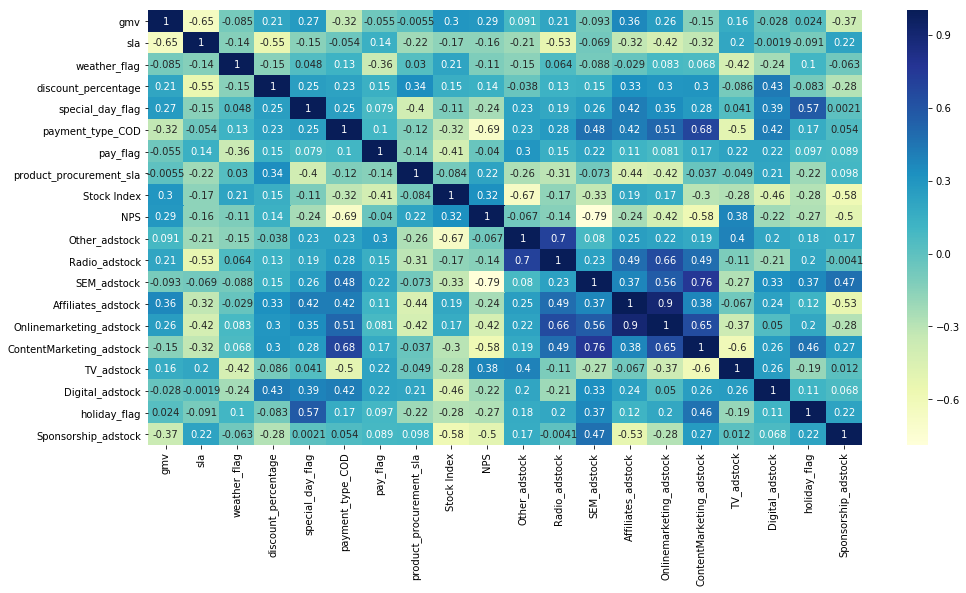

In [337]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

In [338]:
#Droping highly correlated columns
df_final_enter_week = df_final_enter_week.drop('SEM_adstock', axis=1)
df_final_enter_week = df_final_enter_week.drop('Affiliates_adstock', axis=1)
df_final_enter_week = df_final_enter_week.drop('ContentMarketing_adstock', axis=1)
df_final_enter_week = df_final_enter_week.drop('Other_adstock', axis=1)

In [339]:
df_final_enter_week.columns

Index(['gmv', 'sla', 'weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag', 'product_procurement_sla',
       'Stock Index', 'NPS', 'Radio_adstock', 'Onlinemarketing_adstock',
       'TV_adstock', 'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock'],
      dtype='object')

In [340]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
number_variables = ['gmv', 'sla','weather_flag', 'discount_percentage', 'special_day_flag',
       'payment_type_COD', 'pay_flag','product_procurement_sla', 'Stock Index', 'NPS', 
       'Radio_adstock', 'Onlinemarketing_adstock', 'TV_adstock', 
       'Digital_adstock', 'holiday_flag', 'Sponsorship_adstock']

df_final_enter_week[number_variables] = scaler.fit_transform(df_final_enter_week[number_variables])

df_final_enter_week.head()

,gmv,sla,weather_flag,discount_percentage,special_day_flag,payment_type_COD,pay_flag,product_procurement_sla,Stock Index,NPS,Radio_adstock,Onlinemarketing_adstock,TV_adstock,Digital_adstock,holiday_flag,Sponsorship_adstock
0,-1.024454,0.015367,1.128415,-0.405242,-0.602239,0.322182,-0.883611,2.036412,-0.886618,-0.855642,-0.85657,-1.685550,-1.283445,-0.275075,1.805049,1.512539
1,-1.069574,1.205347,0.399073,-0.643119,-0.602239,0.328327,1.063929,0.405643,-0.886618,-0.855642,-0.85657,-1.352355,-0.894625,-0.268950,-0.399691,2.035050
2,-2.386763,1.347362,-0.349893,-1.327849,-0.602239,0.306393,-0.883611,0.161371,-0.886618,-0.855642,-0.85657,-1.285715,-0.661333,-0.267725,-0.399691,2.244054
3,0.789525,-1.039097,-0.521724,2.180882,1.073049,0.505156,-0.883611,1.046085,0.706246,-0.819318,-0.85657,0.375156,0.499954,2.762167,-0.399691,0.711120
4,0.350475,1.348618,0.293578,-0.406549,2.344769,0.341619,0.582869,-1.686275,0.706246,-0.819318,-0.85657,0.097649,0.262710,0.236549,-0.399691,-0.407484


### Multiplicative Model

In [599]:
from sklearn.preprocessing import StandardScaler
df_final_enter_num= np.log(df_final_enter_week)
df_final_enter_num=df_final_enter_week.fillna(0)
df_final_enter_num = df_final_enter_week.replace([np.inf,-np.inf],0)
names= df_final_enter_week.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final_enter_week)
scaled_df = pd.DataFrame(scaled_df,columns=names)
X = scaled_df.drop(columns= ['gmv'])
y = scaled_df['gmv']
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

In [600]:
result = stepwise_selection(x_train,y_train)
print('resulting features:')
print(result)

Drop weather_flag                   with p-value 0.843616
Drop Stock Index                    with p-value 0.831747
Drop Onlinemarketing_adstock        with p-value 0.543802
Drop Radio_adstock                  with p-value 0.173448
Drop TV_adstock                     with p-value 0.193126
Drop Digital_adstock                with p-value 0.474907
Drop payment_type_COD               with p-value 0.3676
Drop NPS                            with p-value 0.256042
Drop pay_flag                       with p-value 0.0192416
Drop holiday_flag                   with p-value 0.0593199
Drop product_procurement_sla        with p-value 0.0758995
Drop discount_percentage            with p-value 0.0567449
Drop special_day_flag               with p-value 0.226842
Drop Sponsorship_adstock            with p-value 0.0650883
resulting features:
['sla']


In [601]:
x_train1 = x_train.loc[:,['sla']]
model_ols = sm.OLS(y_train,x_train1)
results = model_ols.fit()
results.params
print(results.summary())
x_cv2 = x_cv.loc[:,['sla']]
results.predict(x_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     13.15
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00209
Time:                        20:45:23   Log-Likelihood:                -21.934
No. Observations:                  18   AIC:                             45.87
Df Residuals:                      17   BIC:                             46.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sla           -0.7669      0.212     -3.626      0.0

13   -0.328291
17   -0.309333
9     0.985607
23    1.681852
10    0.313942
19   -0.830461
dtype: float64

In [602]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

0.5723805446900929

In [603]:
# mse
mse = np.mean((results.predict(x_cv2)-y_cv)**2)
mse

0.32761948793972745

#### Distributive lag model

In [477]:
df_final_enter_week_lag = df_final_enter_week.copy()
df_final_enter_week_lag['gmv1']=df_final_enter_week['gmv'].shift(-1)
df_final_enter_week_lag['gmv2']=df_final_enter_week['gmv'].shift(-2)
df_final_enter_week_lag['gmv3']=df_final_enter_week['gmv'].shift(-3)

In [478]:
df_final_enter_week_lag = df_final_enter_week_lag.fillna(0)
df_final_enter_week_lag = df_final_enter_week_lag.replace([np.inf,-np.inf],0)

In [483]:
# colnames
cols = df_final_enter_week_lag.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_enter_week_lag)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X,scaled_df1.gmv)

In [484]:
dlag_result=stepwise_selection(x_train1,y_train1)
print(dlag_result)

Drop product_procurement_sla        with p-value 0.994995
Drop NPS                            with p-value 0.773166
Drop TV_adstock                     with p-value 0.281807
Drop special_day_flag               with p-value 0.233249
Drop discount_percentage            with p-value 0.420109
Drop pay_flag                       with p-value 0.13574
Drop weather_flag                   with p-value 0.410859
Drop holiday_flag                   with p-value 0.164102
Drop Onlinemarketing_adstock        with p-value 0.0715377
Drop Digital_adstock                with p-value 0.123544
Drop Stock Index                    with p-value 0.481073
Drop Radio_adstock                  with p-value 0.424618
Drop Sponsorship_adstock            with p-value 0.132656
['sla', 'payment_type_COD']


In [485]:
x_train_1 = x_train1.loc[:,['sla', 'payment_type_COD']]
model1_ols1 = sm.OLS(y_train1,x_train_1)
results1 = model1_ols1.fit()
results1.params
print(results1.summary())
dlag_cv2 = x_cv1.loc[:,['sla', 'payment_type_COD']]
results1.predict(dlag_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     15.36
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000189
Time:                        20:12:21   Log-Likelihood:                -17.775
No. Observations:                  18   AIC:                             39.55
Df Residuals:                      16   BIC:                             41.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sla                 -0.7551      0.159  

13   -0.513683
4    -1.164897
19   -0.395511
22    0.349100
8    -0.677877
3     0.567856
dtype: float64

In [486]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(dlag_cv2)-y_cv1))))
rmse

0.7447817447031374

In [487]:
# mse
mse = np.mean((results1.predict(dlag_cv2)-y_cv1)**2)
mse

0.5546998472430493

### KOYCK Model

In [644]:
df_final_enter_week_koyck = df_final_enter_week.copy()
df_final_enter_week_koyck['gmv1'] = df_final_enter_week_koyck['gmv'].shift(-1)

In [645]:
df_final_enter_week_koyck = df_final_enter_week_koyck.fillna(0)
df_final_enter_week_koyck = df_final_enter_week_koyck.replace([np.inf,-np.inf],0)

In [648]:
# colnames
cols = df_final_enter_week_koyck.columns
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df_final_enter_week_koyck)
scaled_df1 = pd.DataFrame(scaled_df1,columns=cols)
X = scaled_df1.drop(columns= ['gmv'])
y = scaled_df1['gmv']
x_train2, x_cv2, y_train2, y_cv2 = train_test_split(X,scaled_df1.gmv)

In [649]:
koyck_result=stepwise_selection(x_train2,y_train2)
print(koyck_result)

Drop NPS                            with p-value 0.991235
Drop TV_adstock                     with p-value 0.984986
Drop Digital_adstock                with p-value 0.541489
Drop product_procurement_sla        with p-value 0.547139
Drop Onlinemarketing_adstock        with p-value 0.437031
Drop weather_flag                   with p-value 0.428773
Drop holiday_flag                   with p-value 0.27108
Drop pay_flag                       with p-value 0.337337
Drop Stock Index                    with p-value 0.0483456
Drop Sponsorship_adstock            with p-value 0.123941
Drop discount_percentage            with p-value 0.165245
Drop Radio_adstock                  with p-value 0.150964
Drop special_day_flag               with p-value 0.08177
Drop payment_type_COD               with p-value 0.0454091
['sla']


In [653]:
x_train_2 = x_train2.loc[:,['sla','payment_type_COD']]
model_1 = sm.OLS(y_train2,x_train_2)
results1 = model_1.fit()
results1.params
print(results1.summary())
koyck_cv2 = x_cv2.loc[:,['sla','payment_type_COD']]
results1.predict(koyck_cv2)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     11.18
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000915
Time:                        20:52:49   Log-Likelihood:                -19.302
No. Observations:                  18   AIC:                             42.60
Df Residuals:                      16   BIC:                             44.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sla                 -0.6756      0.162  

10    0.089149
22    0.322750
3     0.520685
0    -0.126011
5    -0.604998
21    0.272776
dtype: float64

In [654]:
#RMSE
import math
rmse = math.sqrt(np.mean(np.square((results1.predict(koyck_cv2)-y_cv2))))
rmse

0.5256572734653169

In [655]:
# mse
mse = np.mean((results1.predict(koyck_cv2)-y_cv2)**2)
mse

0.27631556914699096